### 0. Install Library

In [1]:
# !pip3 install xgboost
# !pip3 install imblearn
# !pip3 install reshape
# !pip3 install graphviz

### 0. Set Up Coding Environment

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve


### 1. Data Overview

### 1.1 Load Dataset

In [3]:
Raw_df = pd.read_csv('Airbnb_dataset_cleaned1.csv')
Raw_df

log_price property_type        room_type  accommodates  bathrooms  \
0       5.129899     Apartment  Entire home/apt             7        1.0   
1       4.976734     Apartment  Entire home/apt             5        1.0   
2       4.744932     Apartment  Entire home/apt             2        1.0   
3       4.442651     Apartment     Private room             2        1.0   
4       4.418841     Apartment  Entire home/apt             3        1.0   
...          ...           ...              ...           ...        ...   
31871   3.912023     Apartment     Private room             1        1.0   
31872   5.214936         House  Entire home/apt             6        2.0   
31873   4.276666     Apartment     Private room             2        1.0   
31874   5.068904     Apartment  Entire home/apt             5        1.0   
31875   4.234107     Apartment     Private room             2        1.0   

       bed_type cancellation_policy  cleaning_fee city host_has_profile_pic  \
0      Real Bed              strict          True  NYC                    t   
1      Real Bed            moderate          True  NYC                    t   
2      Real Bed            moderate          True   DC                    t   
3      Real Bed              strict          True   SF                    t   
4      Real Bed            moderate          True   LA                    t   
...         ...                 ...           ...  ...                  ...   
31871  Real Bed            flexible         False  NYC                    t   
31872  Real Bed              strict          True   LA                    t   
31873  Real Bed            flexible          True   LA                    t   
31874  Real Bed              strict          True  NYC                    t   
31875  Real Bed              strict          True  NYC                    t   

      host_identity_verified host_response_rate instant_bookable   latitude  \
0                          f               100%                t  40.766115   
1                          t               100%                t  40.808110   
2                          t               100%                t  38.925627   
3                          t               100%                t  37.753164   
4                          f               100%                t  33.980454   
...                      ...                ...              ...        ...   
31871                      t               100%                f  40.826209   
31872                      f               100%                f  34.036418   
31873                      t               100%                t  34.062627   
31874                      t                93%                t  40.726027   
31875                      t               100%                f  40.670487   

        longitude  number_of_reviews  review_scores_rating  zipcode  bedrooms  \
0      -73.989040                  6                  93.0    10019       3.0   
1      -73.943756                 10                  92.0    10027       1.0   
2      -77.034596                  4                  40.0    20009       0.0   
3     -122.429526                  3                 100.0    94131       1.0   
4     -118.462821                 15                  97.0    90292       1.0   
...           ...                ...                   ...      ...       ...   
31871  -73.951042                 28                  98.0    10031       1.0   
31872 -118.360197                 16                  96.0    90016       3.0   
31873 -118.345824                  2                  90.0    90036       1.0   
31874  -73.987512                150                  82.0  10003.0       2.0   
31875  -73.941769                 19                  96.0  11213.0       2.0   

       beds  
0       3.0  
1       3.0  
2       1.0  
3       1.0  
4       1.0  
...     ...  
31871   1.0  
31872   3.0  
31873   1.0  
31874   3.0  
31875   1.0  

[31876 rows x 20 columns]

### 1.2 Check the Infomation of Original Dataset

In [4]:
Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               31876 non-null  float64
 1   property_type           31876 non-null  object 
 2   room_type               31876 non-null  object 
 3   accommodates            31876 non-null  int64  
 4   bathrooms               31876 non-null  float64
 5   bed_type                31876 non-null  object 
 6   cancellation_policy     31876 non-null  object 
 7   cleaning_fee            31876 non-null  bool   
 8   city                    31876 non-null  object 
 9   host_has_profile_pic    31876 non-null  object 
 10  host_identity_verified  31876 non-null  object 
 11  host_response_rate      31876 non-null  object 
 12  instant_bookable        31876 non-null  object 
 13  latitude                31876 non-null  float64
 14  longitude               31876 non-null

### 1.3 Data Cleaning - Check Missing Values or Duplicate values

In [5]:
# Check if there are null values in the dataset
print(Raw_df.isna().sum())

# Sum up the number of null values in the data
print("Total Null/NA values:", Raw_df.isnull().values.sum())

# Drop rows with any missing values and create a new DataFrame
df_cleaned = Raw_df.dropna()

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64
Total Null/NA values: 0


In our initial preprocessing step, we started by examining the raw dataset for missing or duplicate values. We found that our dataset doesn't contain any missing values, so there's no need to drop or replace null values with means, medians, or other values.

### 2. Original Data Exploration and Analysis (EDA)

###  2.1 Identify the Type of Columns in the Original Dataset

In [6]:
# Identify Categorical Columns
categorical_vars = df_cleaned.select_dtypes(include=['object', 'category']).columns
# Display the Categorical variables
categorical_info = pd.DataFrame({'Categorical Variable': categorical_vars})
categorical_info

Categorical Variable
0           property_type
1               room_type
2                bed_type
3     cancellation_policy
4                    city
5    host_has_profile_pic
6  host_identity_verified
7      host_response_rate
8        instant_bookable
9                 zipcode

In [7]:
# Identify Numerical Columns
numerical_vars = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
# Display the numerical variables
numerical_info = pd.DataFrame({'Numerical Variable': numerical_vars})
numerical_info

Numerical Variable
0             log_price
1          accommodates
2             bathrooms
3              latitude
4             longitude
5     number_of_reviews
6  review_scores_rating
7              bedrooms
8                  beds

### 2.2 Basic statistics of Original Data

In [8]:
# Basic statistics
print("Basic Statistics:")
df_cleaned.describe()

Basic Statistics:


log_price  accommodates     bathrooms      latitude     longitude  \
count  31876.000000  31876.000000  31876.000000  31876.000000  31876.000000   
mean       4.751857      3.329935      1.241843     38.344365    -93.349610   
std        0.677479      2.255250      0.587227      3.152772     21.733626   
min        0.000000      1.000000      0.000000     33.338905   -122.511500   
25%        4.304065      2.000000      1.000000     34.106019   -118.346663   
50%        4.700480      2.000000      1.000000     40.647441    -77.027374   
75%        5.176150      4.000000      1.000000     40.750007    -73.954669   
max        7.575585     16.000000      8.000000     42.390437    -71.000462   

       number_of_reviews  review_scores_rating      bedrooms          beds  
count       31876.000000          31876.000000  31876.000000  31876.000000  
mean           31.044077             94.218283      1.284383      1.797779  
std            43.847461              7.255328      0.866330      1.331471  
min             1.000000             20.000000      0.000000      0.000000  
25%             5.000000             92.000000      1.000000      1.000000  
50%            14.000000             96.000000      1.000000      1.000000  
75%            39.000000             99.000000      2.000000      2.000000  
max           605.000000            100.000000     10.000000     16.000000

### 2.3 PairPlot, Histogram, Scatter plot, Box plot of Original Dataset

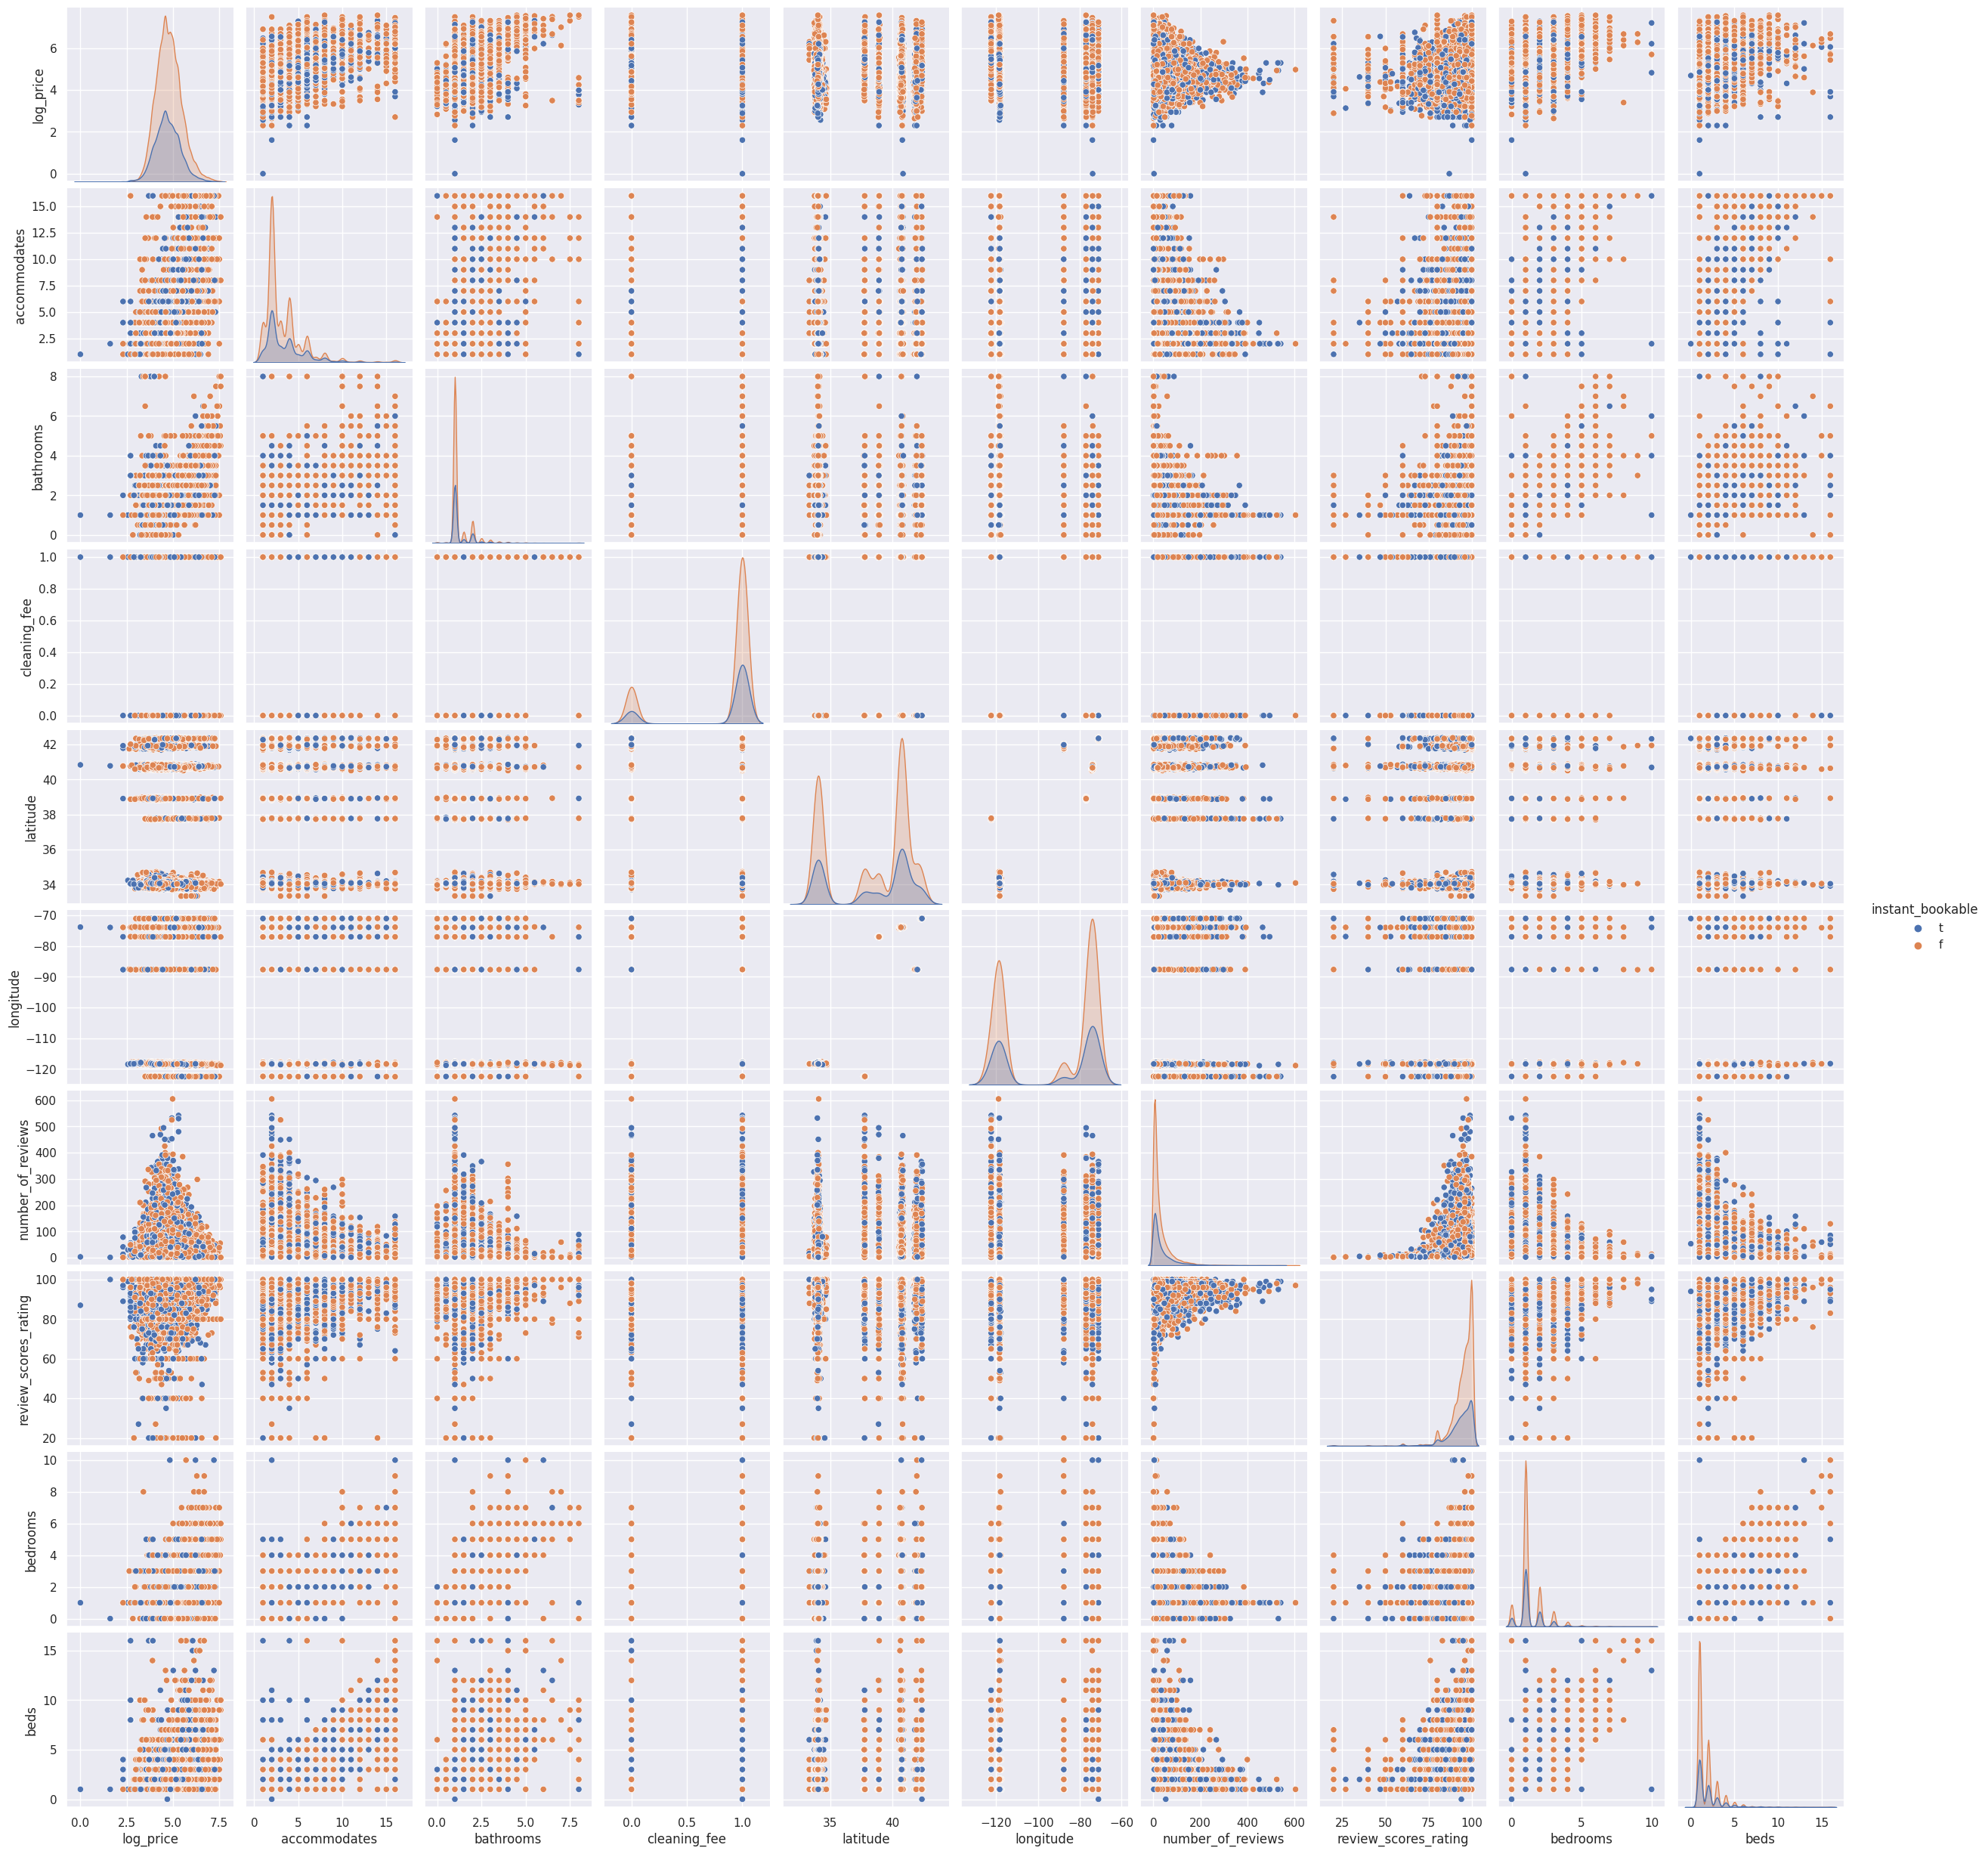

In [9]:
# Create a pairplot with colored points based on the 'instant_bookable' column
sns.set(style="darkgrid")
sns.pairplot(df_cleaned, hue="instant_bookable", diag_kind="kde")
plt.show()

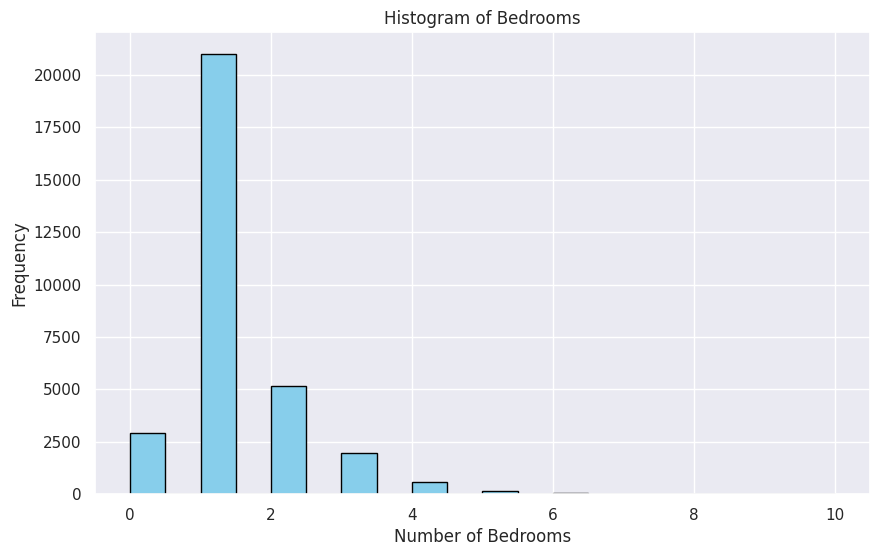

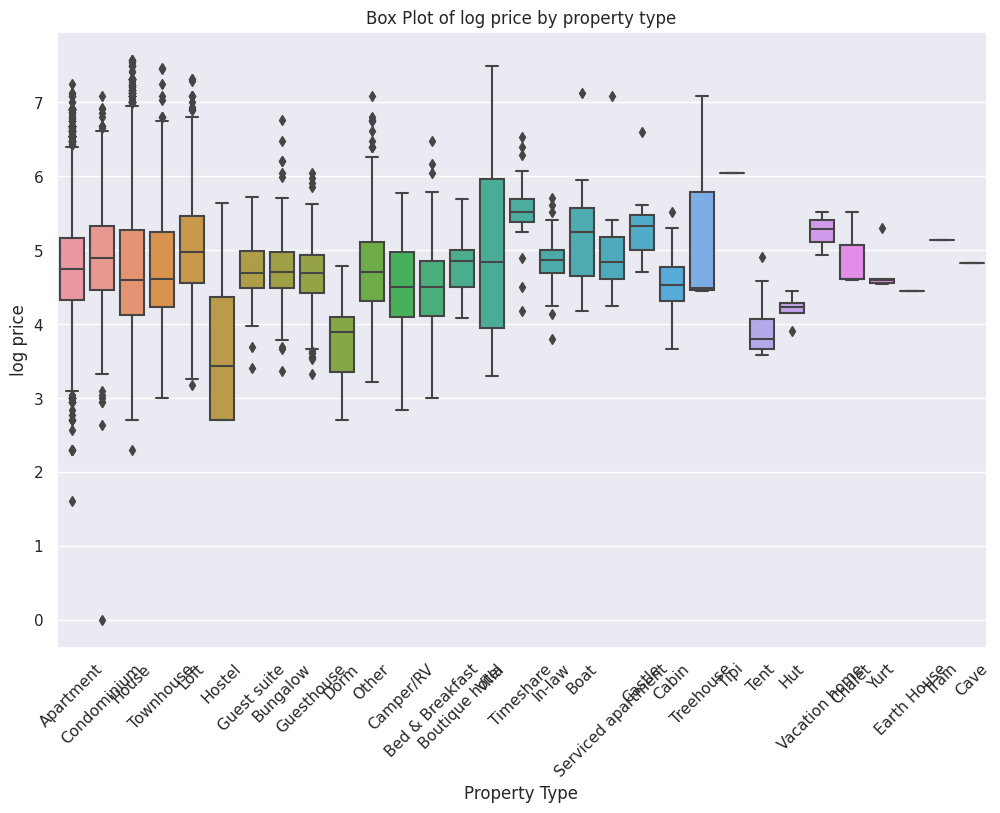

In [10]:
# Histogram of a numerical feature
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['bedrooms'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a box plot of log_price by property_type
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='log_price', data=df_cleaned)
plt.title('Box Plot of log price by property type')
plt.xlabel('Property Type')
plt.ylabel('log price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

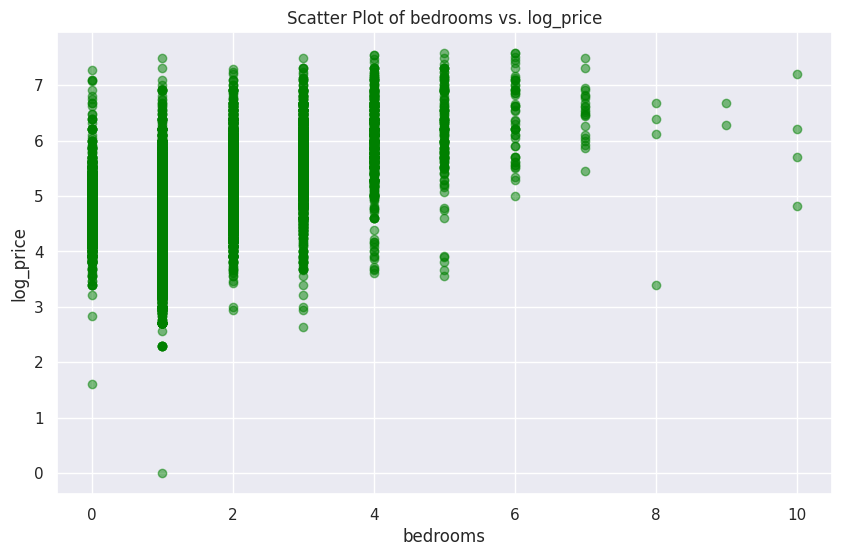

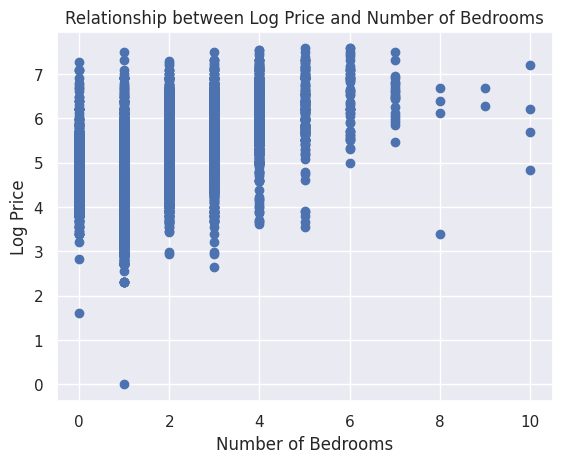

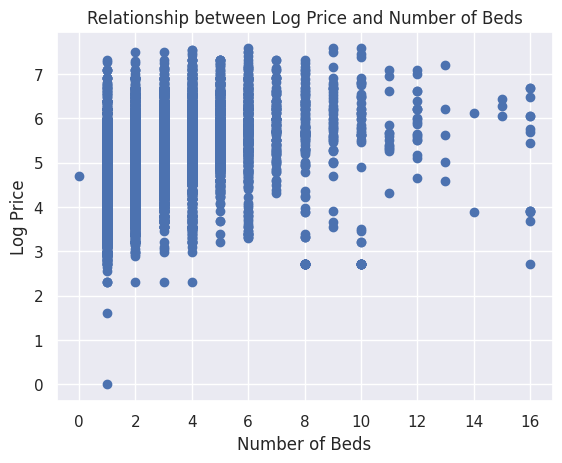

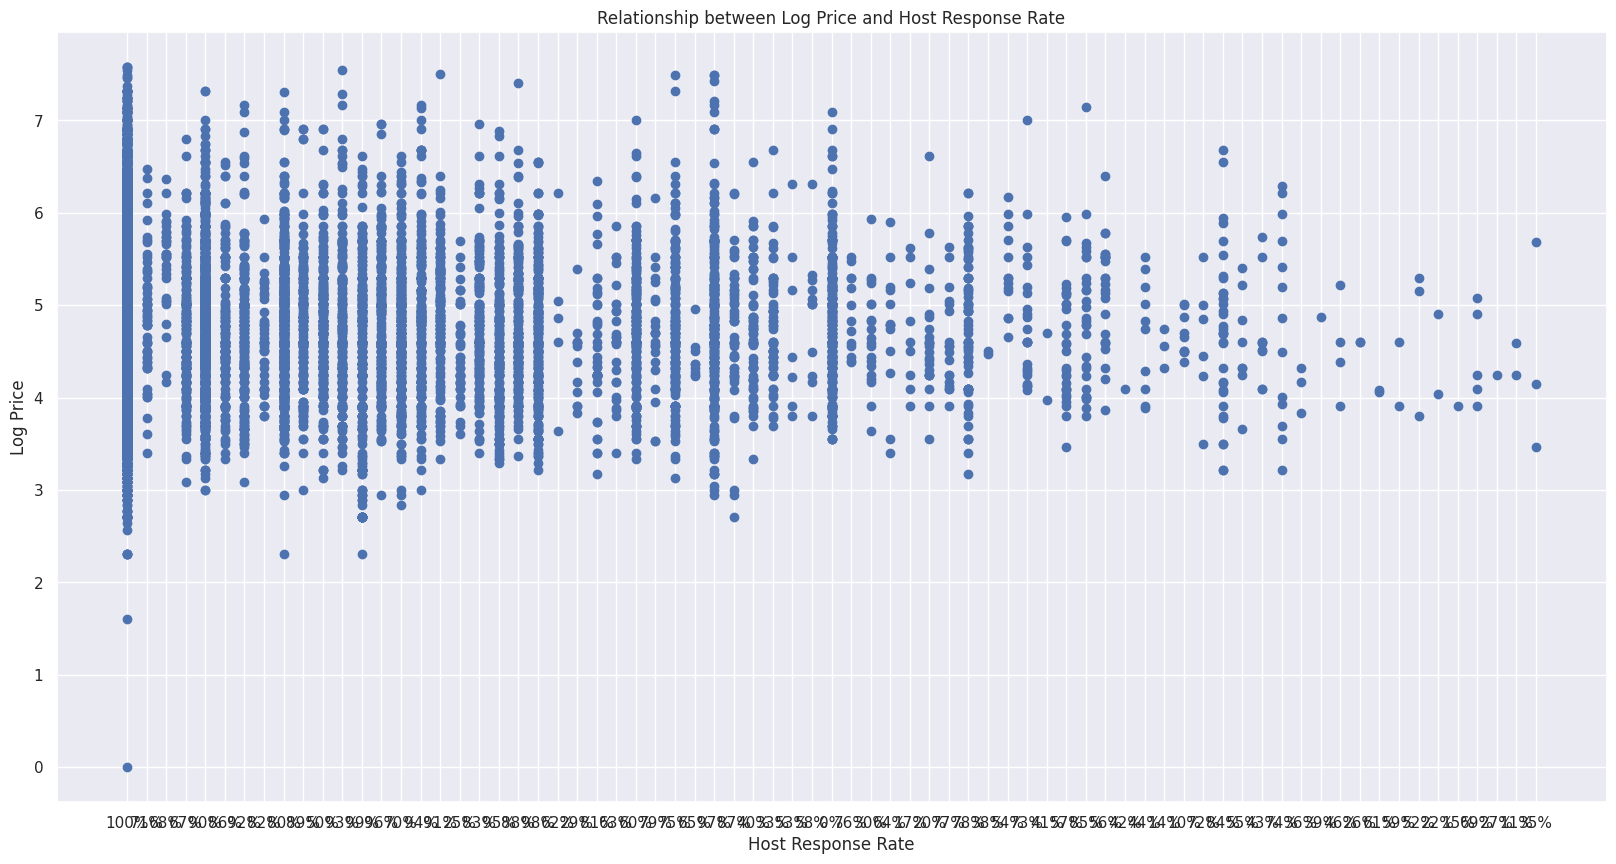

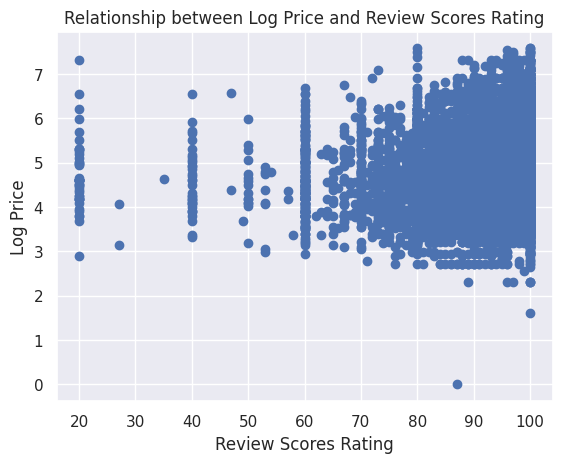

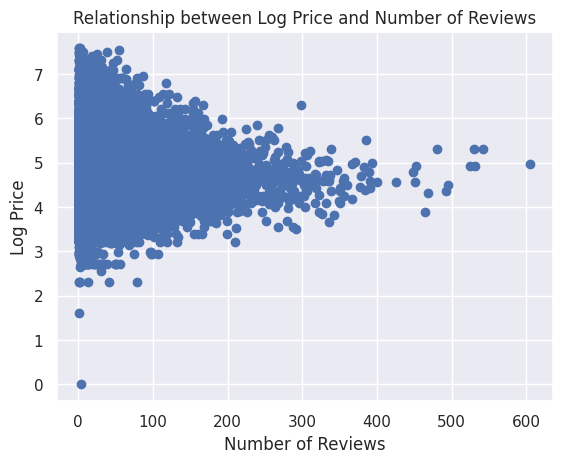

In [11]:
# Scatter plot of two numerical features
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['bedrooms'], df_cleaned['log_price'], alpha=0.5, c='green')
plt.title('Scatter Plot of bedrooms vs. log_price')
plt.xlabel('bedrooms')
plt.ylabel('log_price')
plt.show()

# Scatter plot: The relationship between log_price and the number of bedrooms
plt.scatter(df_cleaned['bedrooms'], df_cleaned['log_price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log Price')
plt.title('Relationship between Log Price and Number of Bedrooms')
plt.show()

# Scatter plot: The relationship between log_price and the number of beds
plt.scatter(df_cleaned['beds'], df_cleaned['log_price'])
plt.xlabel('Number of Beds')
plt.ylabel('Log Price')
plt.title('Relationship between Log Price and Number of Beds')
plt.show()

# Scatter plot: The relationship between log_price and host_response_rate
plt.figure(figsize=(20, 10))
plt.scatter(df_cleaned['host_response_rate'], df_cleaned['log_price'])
plt.xlabel('Host Response Rate')
plt.ylabel('Log Price')
plt.title('Relationship between Log Price and Host Response Rate')
plt.show()

# Scatter plot: The relationship between log_price and review_scores_rating
plt.scatter(df_cleaned['review_scores_rating'], df_cleaned['log_price'])
plt.xlabel('Review Scores Rating')
plt.ylabel('Log Price')
plt.title('Relationship between Log Price and Review Scores Rating')
plt.show()

# Scatter plot: The relationship between log_price and number_of_reviews
plt.scatter(df_cleaned['number_of_reviews'], df_cleaned['log_price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Relationship between Log Price and Number of Reviews')
plt.show()

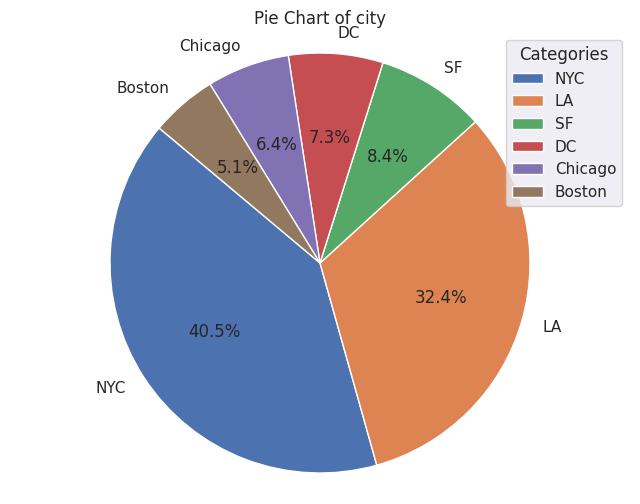

In [12]:
column_to_plot = 'city'
value_counts = df_cleaned[column_to_plot].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_to_plot}')
plt.axis('equal')
# Add a legend
plt.legend(title='Categories', loc='best')
plt.show()

### 3. Data preprocessing

### 3.0 Basic statistics

In [13]:
# Basic statistics
print("Basic Statistics:")
df_cleaned.describe()

Basic Statistics:


log_price  accommodates     bathrooms      latitude     longitude  \
count  31876.000000  31876.000000  31876.000000  31876.000000  31876.000000   
mean       4.751857      3.329935      1.241843     38.344365    -93.349610   
std        0.677479      2.255250      0.587227      3.152772     21.733626   
min        0.000000      1.000000      0.000000     33.338905   -122.511500   
25%        4.304065      2.000000      1.000000     34.106019   -118.346663   
50%        4.700480      2.000000      1.000000     40.647441    -77.027374   
75%        5.176150      4.000000      1.000000     40.750007    -73.954669   
max        7.575585     16.000000      8.000000     42.390437    -71.000462   

       number_of_reviews  review_scores_rating      bedrooms          beds  
count       31876.000000          31876.000000  31876.000000  31876.000000  
mean           31.044077             94.218283      1.284383      1.797779  
std            43.847461              7.255328      0.866330      1.331471  
min             1.000000             20.000000      0.000000      0.000000  
25%             5.000000             92.000000      1.000000      1.000000  
50%            14.000000             96.000000      1.000000      1.000000  
75%            39.000000             99.000000      2.000000      2.000000  
max           605.000000            100.000000     10.000000     16.000000

### 3.1 Correlation Matrix of Original Dataset
### Before removing the variables with high correlations:

*   Detecting a Particular Column Exceeding the Threshold (0.7) and rerun the correlation matrix.

<ipython-input-14-2b075075f2be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr().round(2)


Highly correlated columns: {'beds', 'latitude', 'bedrooms', 'accommodates', 'longitude'}


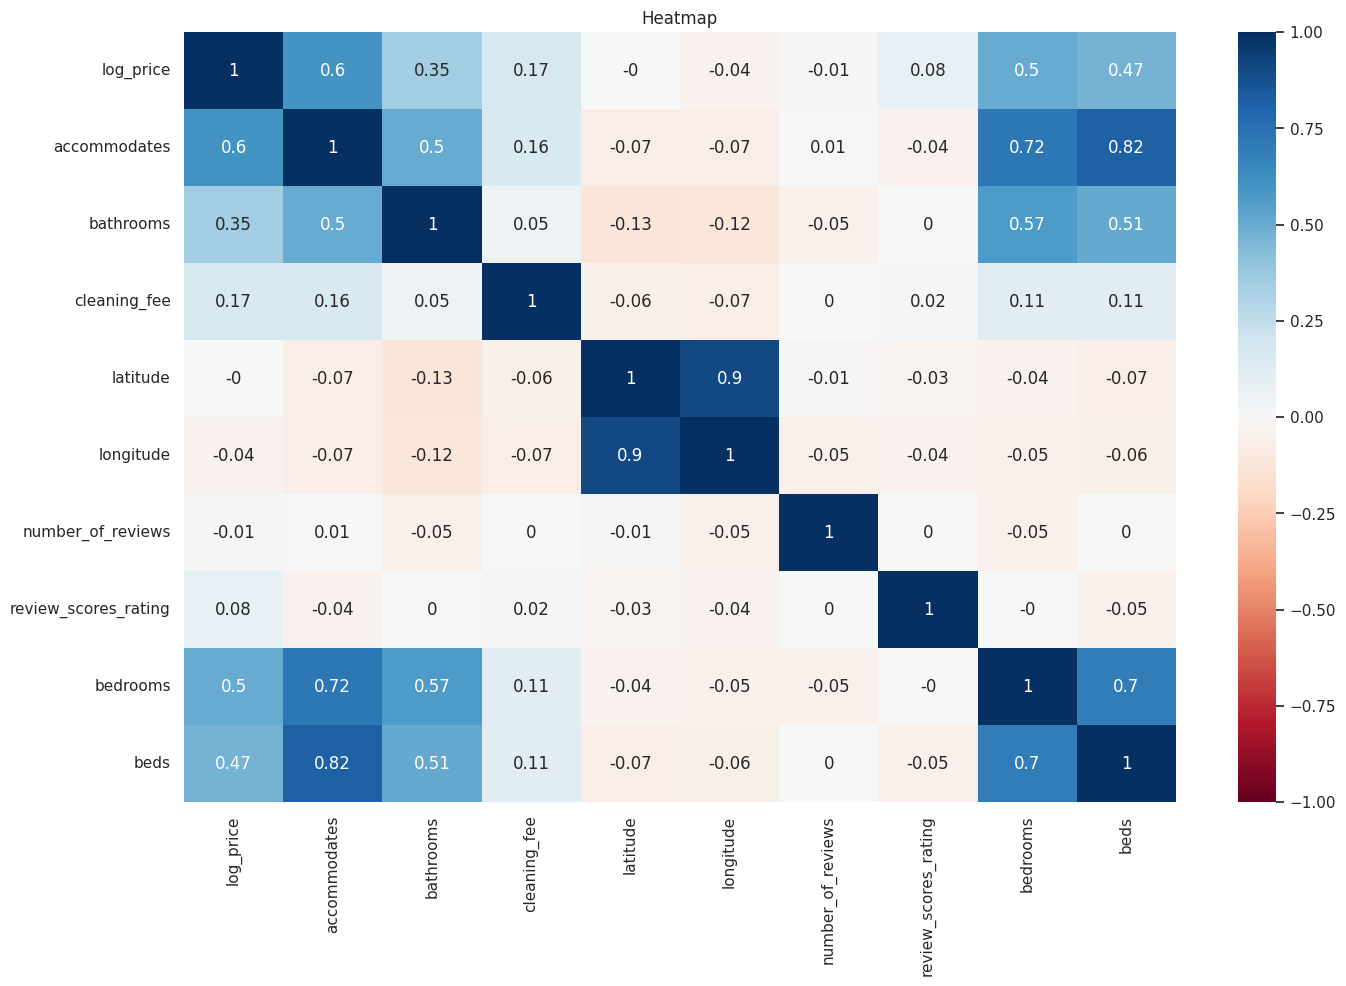

In [14]:
# Calculate the correlation matrix for the numerical variables and round the correlation values to two decimal places.
corr = df_cleaned.corr().round(2)

plt.figure(figsize=(16, 10))

# Create the heatmap using a diverging color scale with the color range being [-1, 1] and center being 0
sns.heatmap(corr, cmap='RdBu', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Heatmap')

# Identify columns with high correlations (greater than a threshold)
threshold = 0.7
high_corr_columns = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            high_corr_columns.add(col_i)
            high_corr_columns.add(col_j)

print("Highly correlated columns:", high_corr_columns)

### 3.2 Drop a specific column which is greater than a threshold (0.7) and unneccessary variables

#### Feature Importance: Here, we determine which features (or variables) are most relevant to our problem, in our case, we apply a correlation analysis.





In [15]:
column_to_drop = ['longitude', 'latitude','accommodates', 'zipcode','host_has_profile_pic']
df_cleaned_new = df_cleaned.drop(columns=column_to_drop, axis=1)
df_cleaned_new

log_price property_type        room_type  bathrooms  bed_type  \
0       5.129899     Apartment  Entire home/apt        1.0  Real Bed   
1       4.976734     Apartment  Entire home/apt        1.0  Real Bed   
2       4.744932     Apartment  Entire home/apt        1.0  Real Bed   
3       4.442651     Apartment     Private room        1.0  Real Bed   
4       4.418841     Apartment  Entire home/apt        1.0  Real Bed   
...          ...           ...              ...        ...       ...   
31871   3.912023     Apartment     Private room        1.0  Real Bed   
31872   5.214936         House  Entire home/apt        2.0  Real Bed   
31873   4.276666     Apartment     Private room        1.0  Real Bed   
31874   5.068904     Apartment  Entire home/apt        1.0  Real Bed   
31875   4.234107     Apartment     Private room        1.0  Real Bed   

      cancellation_policy  cleaning_fee city host_identity_verified  \
0                  strict          True  NYC                      f   
1                moderate          True  NYC                      t   
2                moderate          True   DC                      t   
3                  strict          True   SF                      t   
4                moderate          True   LA                      f   
...                   ...           ...  ...                    ...   
31871            flexible         False  NYC                      t   
31872              strict          True   LA                      f   
31873            flexible          True   LA                      t   
31874              strict          True  NYC                      t   
31875              strict          True  NYC                      t   

      host_response_rate instant_bookable  number_of_reviews  \
0                   100%                t                  6   
1                   100%                t                 10   
2                   100%                t                  4   
3                   100%                t                  3   
4                   100%                t                 15   
...                  ...              ...                ...   
31871               100%                f                 28   
31872               100%                f                 16   
31873               100%                t                  2   
31874                93%                t                150   
31875               100%                f                 19   

       review_scores_rating  bedrooms  beds  
0                      93.0       3.0   3.0  
1                      92.0       1.0   3.0  
2                      40.0       0.0   1.0  
3                     100.0       1.0   1.0  
4                      97.0       1.0   1.0  
...                     ...       ...   ...  
31871                  98.0       1.0   1.0  
31872                  96.0       3.0   3.0  
31873                  90.0       1.0   1.0  
31874                  82.0       2.0   3.0  
31875                  96.0       2.0   1.0  

[31876 rows x 15 columns]

### Correlation Matrix - After removing the variables with high correlations:

<ipython-input-16-f7da2fe2db0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned_new.corr().round(2)


Highly correlated columns: set()


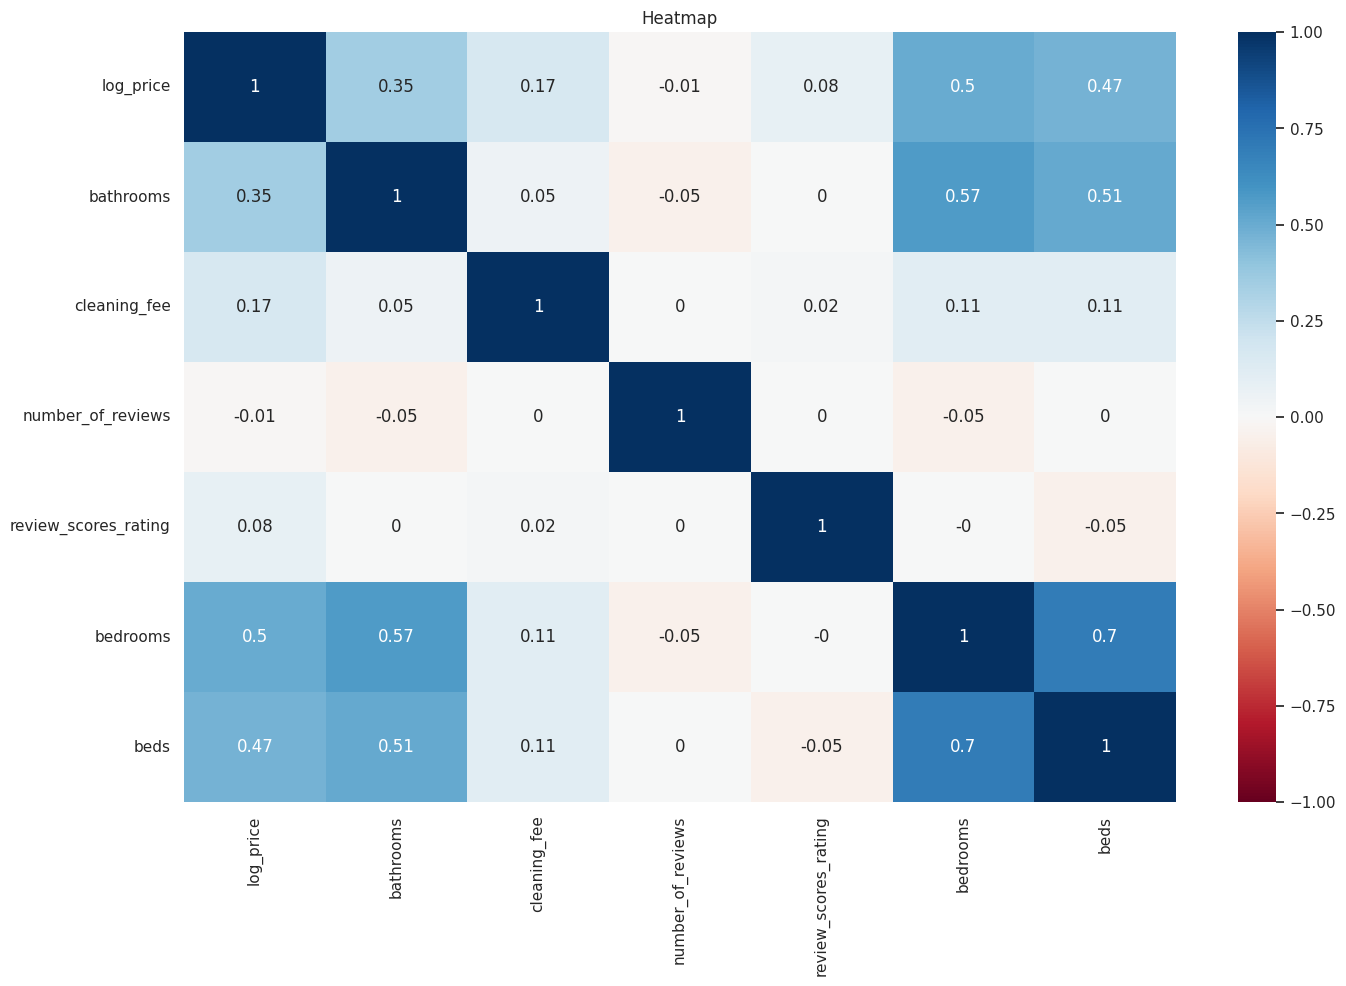

In [16]:
# Calculate the correlation matrix for the numerical variables and round the correlation values to two decimal places.
corr = df_cleaned_new.corr().round(2)

plt.figure(figsize=(16, 10))

# Create the heatmap using a diverging color scale with the color range being [-1, 1] and center being 0
sns.heatmap(corr, cmap='RdBu', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Heatmap')

# Identify columns with high correlations (greater than a threshold)
threshold = 0.7
high_corr_columns = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            high_corr_columns.add(col_i)
            high_corr_columns.add(col_j)

print("Highly correlated columns:", high_corr_columns)

### 3.3 Data Transformation



### Label Encoding for Categorical Variable




In [17]:
# Change boolean columns to object (string) type
bool_columns = ['cleaning_fee']
df_cleaned[bool_columns] = df_cleaned_new[bool_columns].astype(str)

# Define the mapping dictionary
property_type_mapping = {'Apartment': 0, 'House': 1, 'Condominium': 2, 'Townhouse': 3}

# Define a custom function to apply the mapping
def map_property_type(property_type):
    return property_type_mapping.get(property_type, 4)

# Apply the custom function to the 'property_type' column
df_cleaned_new['property_type'] = df_cleaned_new['property_type'].apply(map_property_type)

# Display the updated DataFrame
print(df_cleaned_new['property_type'].unique())

[0 2 1 3 4]


In [18]:
df_cleaned_new['property_type'].unique()
category_counts = df_cleaned_new['property_type'].value_counts()
print(category_counts)

0    19995
1     7896
4     2008
2     1163
3      814
Name: property_type, dtype: int64


In [19]:
# Create a dictionary to map room names to numerical values
room_mapping = {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df_cleaned_new['room_type'] = df_cleaned_new['room_type'].replace(room_mapping)

# Display the updated DataFrame
print(df_cleaned_new['room_type'].unique())


[0 1 2]


In [20]:
category_counts = df_cleaned_new['room_type'].value_counts()
print(category_counts)

0    18281
1    12759
2      836
Name: room_type, dtype: int64


In [21]:
df_cleaned_new['bed_type'].unique()
# Define the mapping dictionary for 'bed_type'
bed_type_mapping = {'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Airbed': 3, 'Couch': 4}

# Map the values using the defined dictionary
df_cleaned_new['bed_type'] = df_cleaned_new['bed_type'].replace(bed_type_mapping)

# Display the updated DataFrame
print(df_cleaned_new['bed_type'].unique())

[0 1 2 4 3]


In [22]:
category_counts = df_cleaned_new['bed_type'].value_counts()
print(category_counts)

0    31004
1      346
2      282
3      156
4       88
Name: bed_type, dtype: int64


In [23]:
# Create a dictionary to map city names to numerical values
cancellation_mapping = {'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict_30': 3,  'super_strict_60': 4}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df_cleaned_new['cancellation_policy'] = df_cleaned_new['cancellation_policy'].replace(cancellation_mapping)

# Display the updated DataFrame
print(df_cleaned_new['cancellation_policy'].unique())

[2 1 0 3 4]


In [24]:
category_counts = df_cleaned_new['cancellation_policy'].value_counts()
print(category_counts)

2    16423
1     9298
0     6096
3       53
4        6
Name: cancellation_policy, dtype: int64


In [25]:
df_cleaned_new['city'].unique()


array(['NYC', 'DC', 'SF', 'LA', 'Boston', 'Chicago'], dtype=object)

In [26]:
# Create a dictionary to map city names to numerical values
city_mapping = {'NYC': 0, 'LA': 1, 'SF': 2,  'DC': 3,  'Chicago': 4, 'Boston': 5}

# Map the values using the defined dictionary
df_cleaned_new['city'] = df_cleaned_new['city'].replace(city_mapping)

# Display the updated DataFrame
print(df_cleaned_new['city'].unique())

[0 3 2 1 5 4]


In [27]:
category_counts = df_cleaned_new['city'].value_counts()
print(category_counts)

0    12900
1    10322
2     2681
3     2316
4     2027
5     1630
Name: city, dtype: int64


In [28]:
label_encoder = LabelEncoder()
df_cleaned_new['host_identity_verified'] = label_encoder.fit_transform(df_cleaned_new['host_identity_verified']) # True: 1; False: 0
df_cleaned_new['host_identity_verified'].unique()

array([0, 1])

In [29]:
# Replace "%" with an empty string in the specified column
df_cleaned_new['host_response_rate'] = df_cleaned_new['host_response_rate'].str.replace('%', '')
# Convert the object column to numeric
df_cleaned_new['host_response_rate'] = pd.to_numeric(df_cleaned_new['host_response_rate'], errors='coerce')
df_cleaned_new['instant_bookable'] = label_encoder.fit_transform(df_cleaned_new['instant_bookable']) # True: 1; False: 0
df_cleaned_new['instant_bookable'].unique()

df_cleaned_new['cleaning_fee'] = label_encoder.fit_transform(df_cleaned_new['cleaning_fee']) # True: 1; False: 0
df_cleaned_new['cleaning_fee'].unique()

array([1, 0])

In [30]:
#  List of categorical columns and numerical columns
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                        'host_identity_verified', 'host_response_rate',
                       'instant_bookable']
numerical_columns = ['bathrooms', 'number_of_reviews',
                     'review_scores_rating', 'bedrooms', 'beds']

# Select categorical data and numerical data
categorical_data = df_cleaned_new[categorical_columns]
numerical_data = df_cleaned_new[numerical_columns]

### 3.4 Normalize the data using StandardScaler( )

In [31]:
# Initialize scalers
standard_scaler = StandardScaler()

# Standardize the data
standardized_data = standard_scaler.fit_transform(df_cleaned_new[numerical_columns])

# Create DataFrames for the transformed data
standardized_df = pd.DataFrame(standardized_data, columns=numerical_columns)

print("\nStandardized Data:")
standardized_df.max()


Standardized Data:


bathrooms               11.508776
number_of_reviews       13.090038
review_scores_rating     0.796905
bedrooms                10.060547
beds                    10.666731
dtype: float64

### Testing for normality - Histogram plot

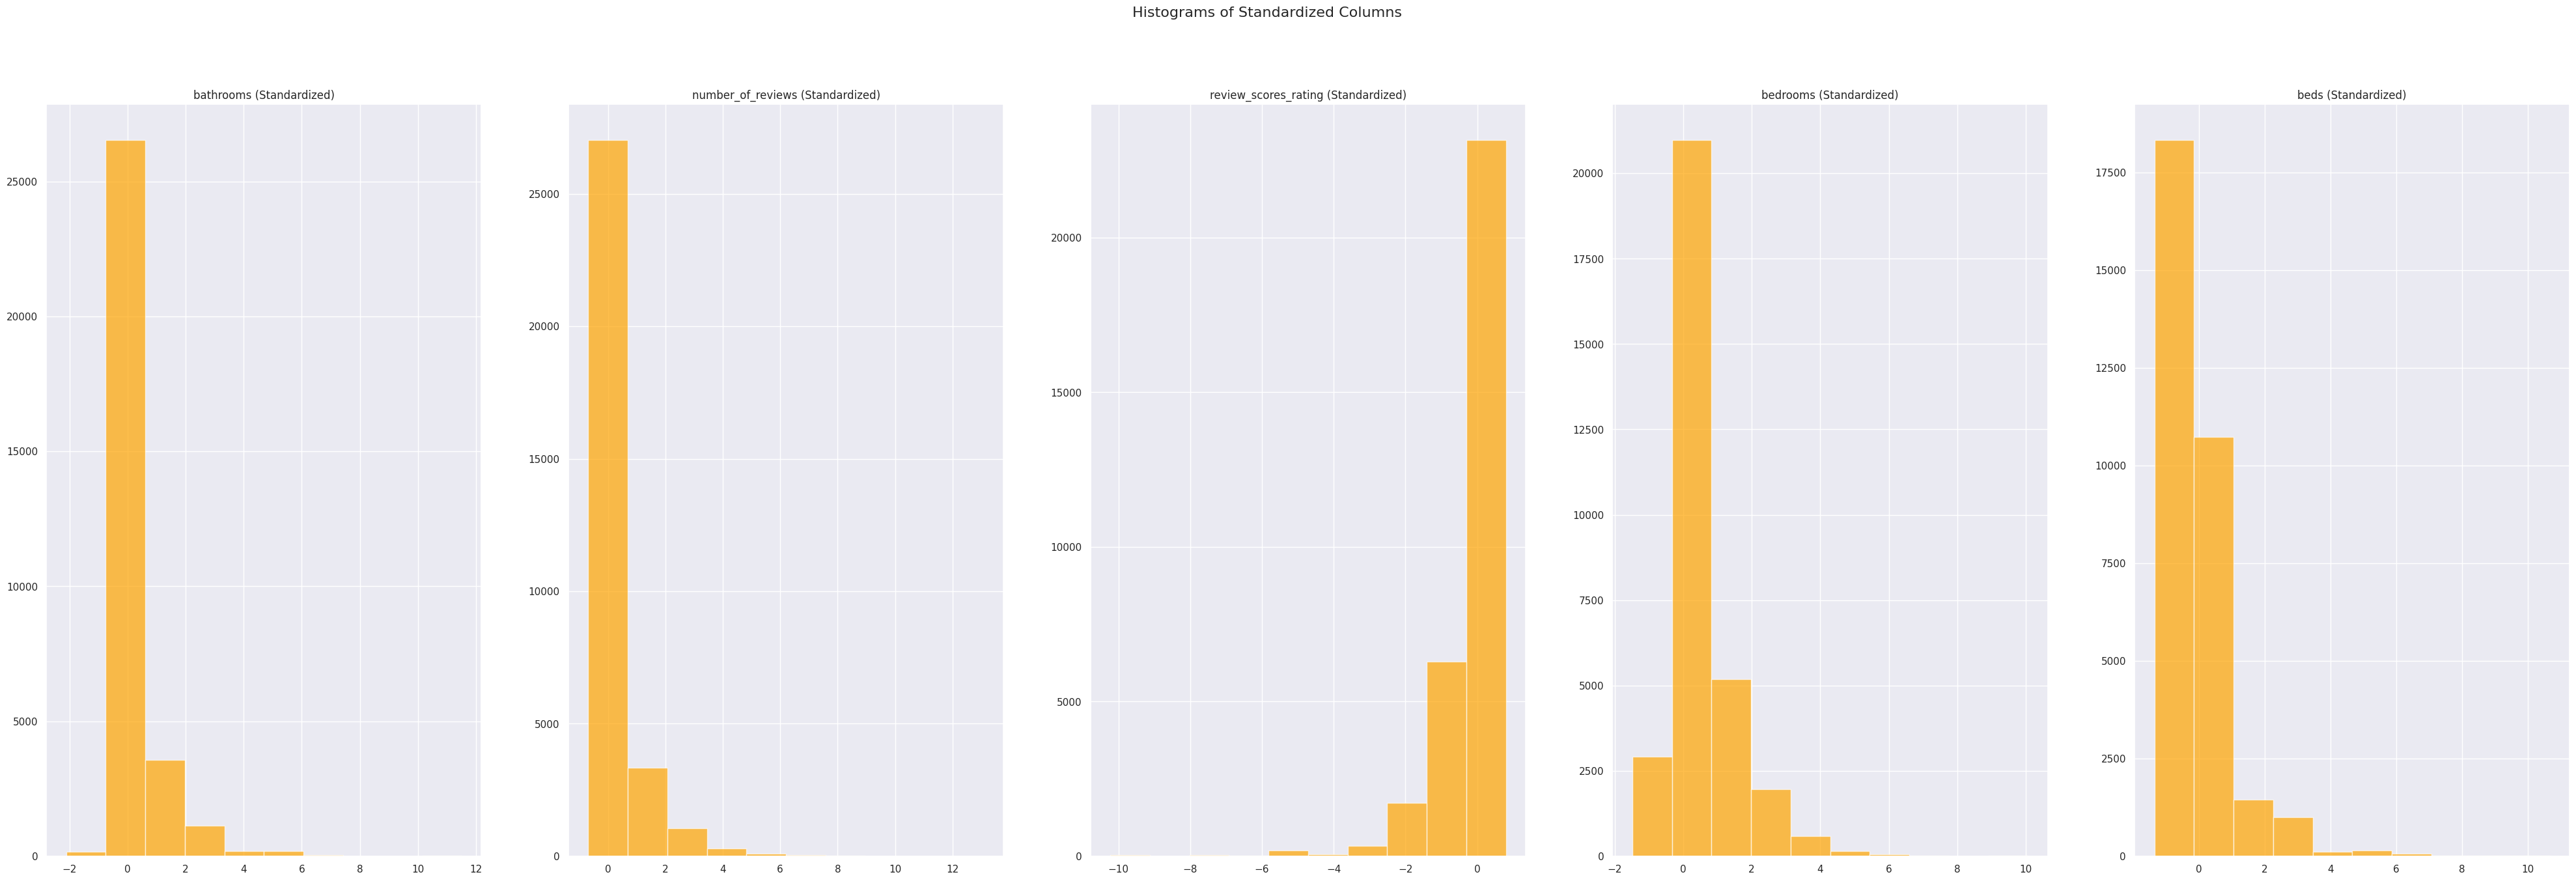

In [32]:
# Plot the histograms for each standardized column
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(50, 15))
fig.suptitle("Histograms of Standardized Columns", fontsize=16)

for i, column in enumerate(numerical_columns):
    axs[i].hist(standardized_df[column], bins=10, color='orange', alpha=0.7)
    axs[i].set_title(column + " (Standardized)")

plt.show()

### 3.5 Normalize the data using MinMaxScaler()

In [33]:
# List of categorical columns and numerical columns
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                        'host_identity_verified', 'host_response_rate',
                       'instant_bookable']
numerical_columns = ['bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

# Select categorical data and numerical data
categorical_data = df_cleaned_new[categorical_columns]
numerical_data = df_cleaned_new[numerical_columns]

In [34]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
# Normalize the data
normalized_data = min_max_scaler.fit_transform(df_cleaned_new[numerical_columns])
# Create DataFrames for the transformed data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)
# Display the results
print("Normalized Data:")
normalized_df


Normalized Data:


bathrooms  number_of_reviews  review_scores_rating  bedrooms    beds
0          0.125           0.008278                0.9125       0.3  0.1875
1          0.125           0.014901                0.9000       0.1  0.1875
2          0.125           0.004967                0.2500       0.0  0.0625
3          0.125           0.003311                1.0000       0.1  0.0625
4          0.125           0.023179                0.9625       0.1  0.0625
...          ...                ...                   ...       ...     ...
31871      0.125           0.044702                0.9750       0.1  0.0625
31872      0.250           0.024834                0.9500       0.3  0.1875
31873      0.125           0.001656                0.8750       0.1  0.0625
31874      0.125           0.246689                0.7750       0.2  0.1875
31875      0.125           0.029801                0.9500       0.2  0.0625

[31876 rows x 5 columns]

### Testing for normality - Histogram plot

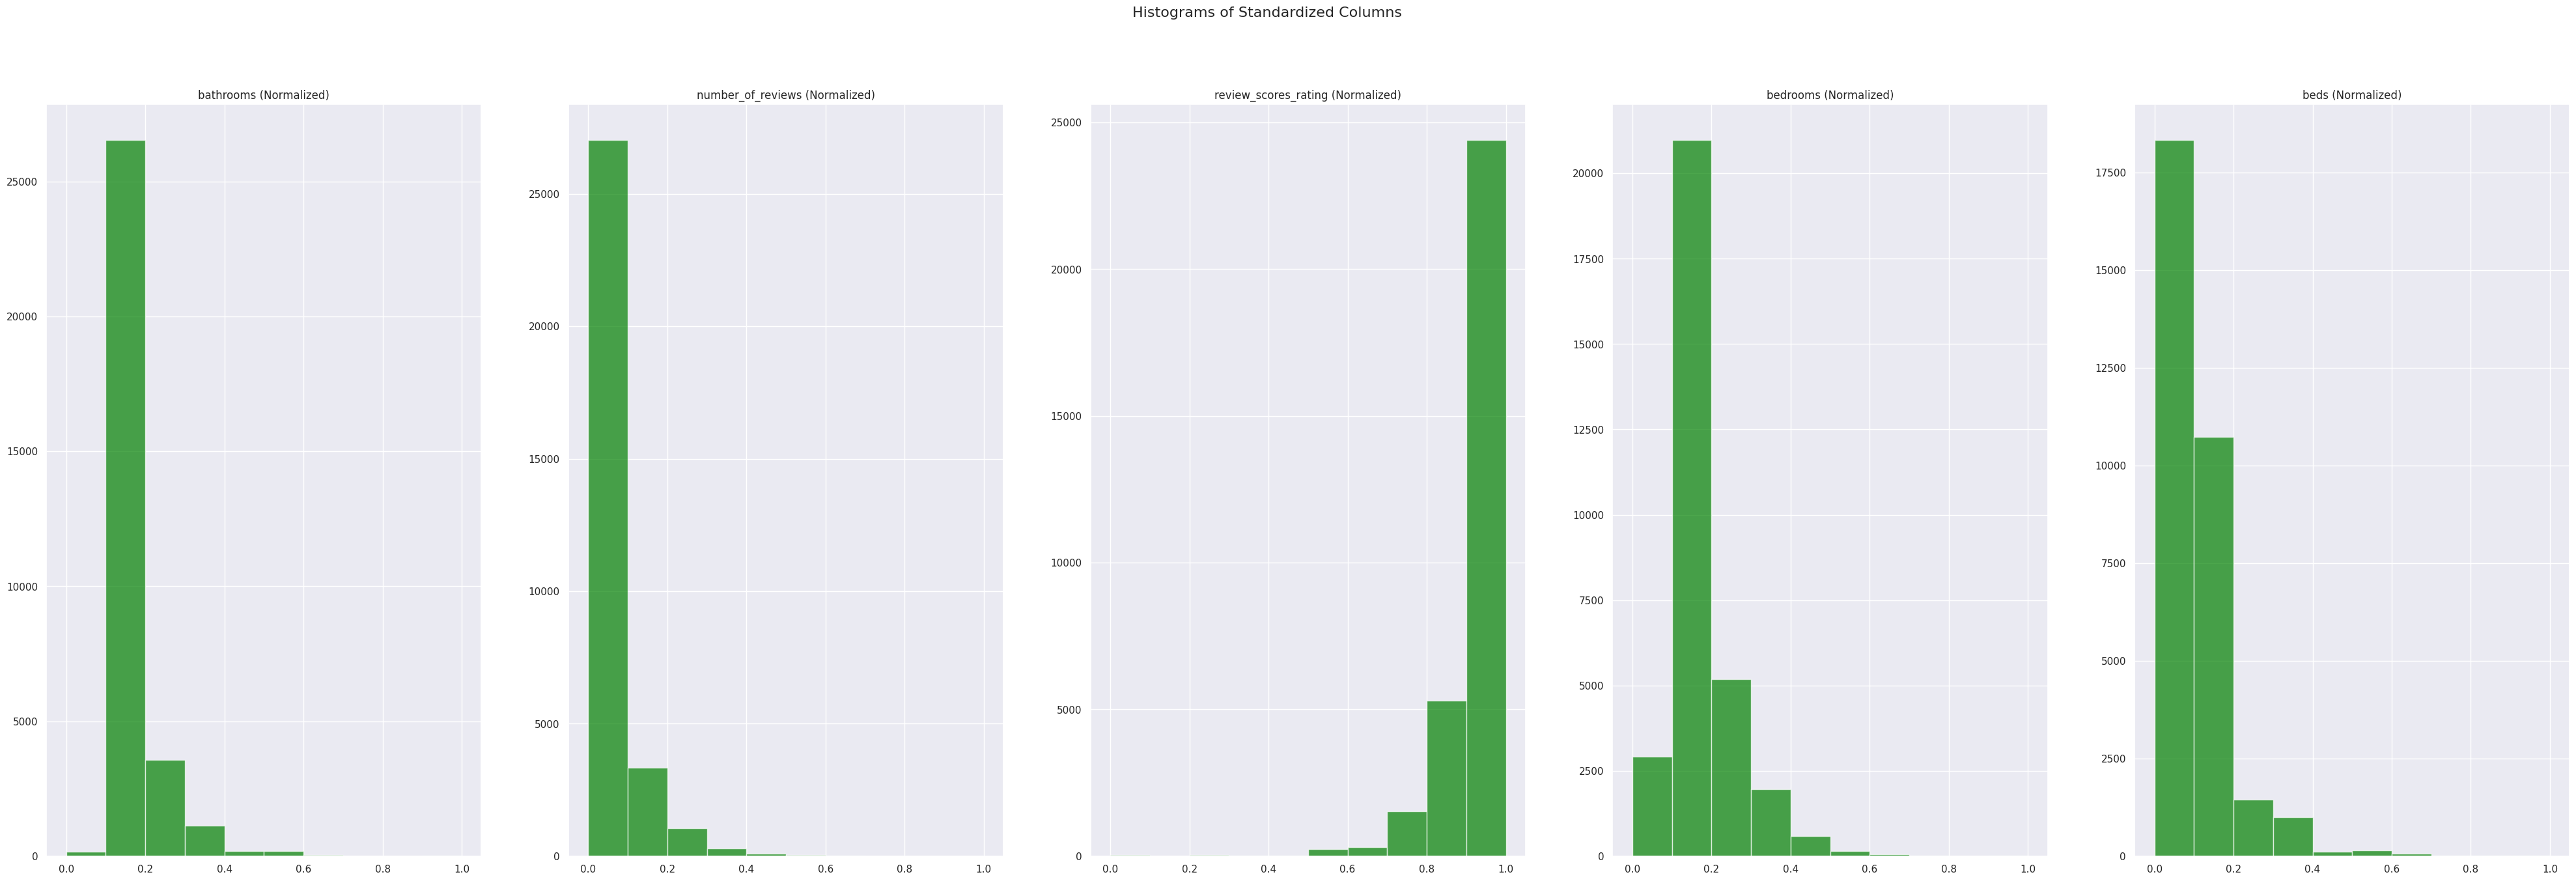

In [35]:
# Plot the histograms for each Normalized column
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(50, 15))
fig.suptitle("Histograms of Standardized Columns", fontsize=16)

for i, column in enumerate(numerical_columns):
    axs[i].hist(normalized_df[column], bins=10, color='green', alpha=0.7)
    axs[i].set_title(column + " (Normalized)")

plt.show()

### 3.6 Log Transformation of "Price"

 Regarding our target variable, "price," it's important to note that it has already a transformation from its original price to the natural logarithm (log of price) in the raw dataset we obtained from Kaggle. As a result, we keep it in its log-transformed state and there's no need for further normalization, as this transformation is essential for our analysis.


In [36]:
# Target variable
log_price = df_cleaned['log_price']
log_price

0        5.129899
1        4.976734
2        4.744932
3        4.442651
4        4.418841
           ...   
31871    3.912023
31872    5.214936
31873    4.276666
31874    5.068904
31875    4.234107
Name: log_price, Length: 31876, dtype: float64

### 3.7 Merging the data

In [37]:
# Target variable
log_price = df_cleaned_new['log_price']

# Merge the dataframes for standardized data
standardized_data_merged = pd.concat([categorical_data, standardized_df, log_price], axis=1)
standardized_data_merged

property_type  room_type  bed_type  cancellation_policy  city  \
0                  0          0         0                    2     0   
1                  0          0         0                    1     0   
2                  0          0         0                    1     3   
3                  0          1         0                    2     2   
4                  0          0         0                    1     1   
...              ...        ...       ...                  ...   ...   
31871              0          1         0                    0     0   
31872              1          0         0                    2     1   
31873              0          1         0                    0     1   
31874              0          0         0                    2     0   
31875              0          1         0                    2     0   

       host_identity_verified  host_response_rate  instant_bookable  \
0                           0                 100                 1   
1                           1                 100                 1   
2                           1                 100                 1   
3                           1                 100                 1   
4                           0                 100                 1   
...                       ...                 ...               ...   
31871                       1                 100                 0   
31872                       0                 100                 0   
31873                       1                 100                 1   
31874                       1                  93                 1   
31875                       1                 100                 0   

       bathrooms  number_of_reviews  review_scores_rating  bedrooms      beds  \
0      -0.411846          -0.571173             -0.167918  1.980358  0.902941   
1      -0.411846          -0.479946             -0.305750 -0.328267  0.902941   
2      -0.411846          -0.616786             -7.473009 -1.482580 -0.599180   
3      -0.411846          -0.639593              0.796905 -0.328267 -0.599180   
4      -0.411846          -0.365912              0.383409 -0.328267 -0.599180   
...          ...                ...                   ...       ...       ...   
31871  -0.411846          -0.069425              0.521241 -0.328267 -0.599180   
31872   1.291100          -0.343106              0.245577  1.980358  0.902941   
31873  -0.411846          -0.662399             -0.581414 -0.328267 -0.599180   
31874  -0.411846           2.712991             -1.684069  0.826046  0.902941   
31875  -0.411846          -0.274686              0.245577  0.826046 -0.599180   

       log_price  
0       5.129899  
1       4.976734  
2       4.744932  
3       4.442651  
4       4.418841  
...          ...  
31871   3.912023  
31872   5.214936  
31873   4.276666  
31874   5.068904  
31875   4.234107  

[31876 rows x 14 columns]

In [38]:
# Merge the dataframes for normalized data
normalized_data_merged = pd.concat([categorical_data, normalized_df,log_price], axis=1)
normalized_data_merged

property_type  room_type  bed_type  cancellation_policy  city  \
0                  0          0         0                    2     0   
1                  0          0         0                    1     0   
2                  0          0         0                    1     3   
3                  0          1         0                    2     2   
4                  0          0         0                    1     1   
...              ...        ...       ...                  ...   ...   
31871              0          1         0                    0     0   
31872              1          0         0                    2     1   
31873              0          1         0                    0     1   
31874              0          0         0                    2     0   
31875              0          1         0                    2     0   

       host_identity_verified  host_response_rate  instant_bookable  \
0                           0                 100                 1   
1                           1                 100                 1   
2                           1                 100                 1   
3                           1                 100                 1   
4                           0                 100                 1   
...                       ...                 ...               ...   
31871                       1                 100                 0   
31872                       0                 100                 0   
31873                       1                 100                 1   
31874                       1                  93                 1   
31875                       1                 100                 0   

       bathrooms  number_of_reviews  review_scores_rating  bedrooms    beds  \
0          0.125           0.008278                0.9125       0.3  0.1875   
1          0.125           0.014901                0.9000       0.1  0.1875   
2          0.125           0.004967                0.2500       0.0  0.0625   
3          0.125           0.003311                1.0000       0.1  0.0625   
4          0.125           0.023179                0.9625       0.1  0.0625   
...          ...                ...                   ...       ...     ...   
31871      0.125           0.044702                0.9750       0.1  0.0625   
31872      0.250           0.024834                0.9500       0.3  0.1875   
31873      0.125           0.001656                0.8750       0.1  0.0625   
31874      0.125           0.246689                0.7750       0.2  0.1875   
31875      0.125           0.029801                0.9500       0.2  0.0625   

       log_price  
0       5.129899  
1       4.976734  
2       4.744932  
3       4.442651  
4       4.418841  
...          ...  
31871   3.912023  
31872   5.214936  
31873   4.276666  
31874   5.068904  
31875   4.234107  

[31876 rows x 14 columns]

### 4. Preparing for Model Building

### 4.1 Dataset Splitting at an 8:2 ratio with original dataset

In [39]:
# Define features (attributes) and labels
X = normalized_data_merged.drop(['log_price'], axis=1)
y = normalized_data_merged['log_price']

# labels = np.unique(y)
# print("Unique labels:", labels)

# Split the data into training and testing sets with 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25500, 13)
X_test shape: (6376, 13)
y_train shape: (25500,)
y_test shape: (6376,)


### 5. Models

### Rule of Building Models

**Hyperparameter Tuning:**

- **Random Search:** Use random search to explore a range of hyperparameters for each model. Random search can help us quickly narrow down the hyperparameter space and identify promising regions.

- **Grid Search:** After narrowing down the hyperparameter space using random search, use grid search to perform a more exhaustive search within the specified range of hyperparameters. Grid search systematically evaluates all combinations within the defined parameter grid.

**Model Evaluation:**

- Evaluate the performance of each model using appropriate regression metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared).

**Model Comparison:**

- **Compare the performance** of all four models to determine which one performs best for your specific Airbnb price prediction task.

- **Calculate Evaluation Metrics:** Compute key regression metrics for each model on your validation dataset. Common metrics include:

 1. Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

 2. Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.

 3. Root Mean Squared Error (RMSE): The square root of MSE, providing error in the same units as the target variable.

 4. R-squared (R2) Score: Measures the proportion of the variance in the target variable explained by the model.

- **Visualize Results:** Create visualizations such as scatter plots of predicted vs. actual prices, residual plots, or bar charts of feature importances (for tree-based models) to gain insights into model behavior.

**Final Model Selection:**

- Choose the best-performing model as our final regression model for predicting Airbnb prices.

- **Performance Metrics:** Consider the regression metrics we calculated. The model with the lowest MAE, MSE, or RMSE and the highest R-squared score is generally preferred as it indicates better predictive performance.


### Random Forest - As a baseline model

In [80]:
# Define the parameter grid for Randomized Search
random_param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search to explore a broad range of hyperparameters
random_search = RandomizedSearchCV(
    rf_model, param_distributions=random_param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

# Get the best parameters from Randomized Search
best_random_params = random_search.best_params_
print("Best Parameters from Randomized Search:")
print(best_random_params)

# Define the parameter grid for Grid Search (focused on best_random_params)
grid_param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 50, best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],
    'max_depth': [best_random_params['max_depth'] - 1, best_random_params['max_depth'], best_random_params['max_depth'] + 1],
    'min_samples_split': [best_random_params['min_samples_split'] - 1, best_random_params['min_samples_split'], best_random_params['min_samples_split'] + 1]
}

# Perform Grid Search around the best parameters from Randomized Search
grid_search = GridSearchCV(
    rf_model, param_grid=grid_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best parameters from Grid Search
best_grid_params = grid_search.best_params_
print("\nBest Parameters from Grid Search:")
print(best_grid_params)

# Train the final model with the best hyperparameters
final_rf_model = RandomForestRegressor(**best_grid_params, random_state=42)
final_rf_model.fit(X_train, y_train)

# Make predictions and evaluate the final model
y_train_pred = final_rf_model.predict(X_train)
y_test_pred = final_rf_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Final Random Forest Train MSE: {mse_train}")
print(f"Final Random Forest Test MSE: {mse_test}")
print(f"\n-------------------")
print(f"Final Random Forest Train MAE: {mae_train}")
print(f"Final Random Forest Test MAE: {mae_test}")
print(f"\n-------------------")
print(f"Final Random Forest Train RMSE: {rmse_train}")
print(f"Final Random Forest Test RMSE: {rmse_test}")
print(f"\n-------------------")
print(f"Final Random Forest Train R2: {r2_train}")
print(f"Final Random Forest Test R2: {r2_test}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Randomized Search:
{'n_estimators': 400, 'min_samples_split': 2, 'max_depth': 8}
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils


Best Parameters from Grid Search:
{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 450}
Final Random Forest Train MSE: 0.1420649558278688
Final Random Forest Test MSE: 0.16977152660294564

-------------------
Final Random Forest Train MAE: 0.2923867774523002
Final Random Forest Test MAE: 0.31767561374994635

-------------------
Final Random Forest Train RMSE: 0.37691505120898106
Final Random Forest Test RMSE: 0.4120334047173186

-------------------
Final Random Forest Train R2: 0.6891284805351237
Final Random Forest Test R2: 0.6363214674082224


### Random Forest: MSE, MAE, RMSE, R2

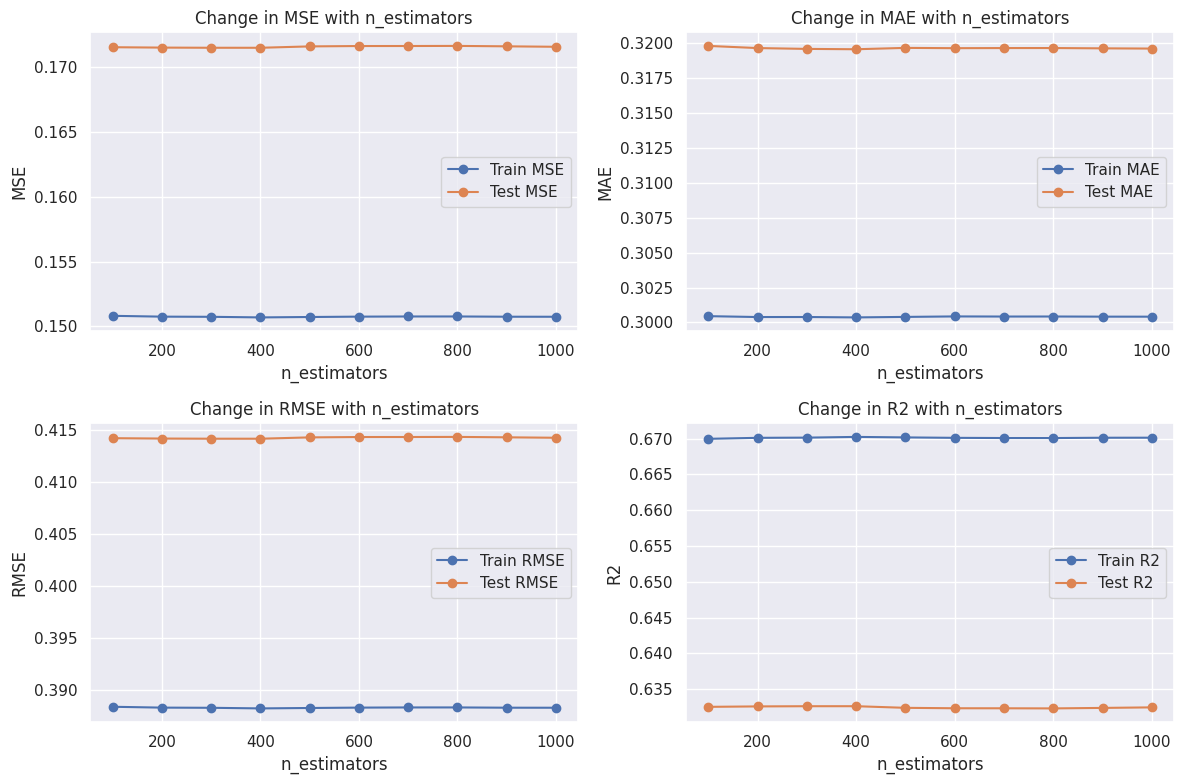

In [83]:
# Plot the change for each hyperparameter value
param_to_plot = 'n_estimators'
param_values = random_param_dist[param_to_plot]
# Initialize lists to store metrics
train_mse = []
test_mse = []
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []

# Loop through the hyperparameter values
for value in param_values:
    # Create and train the model with the current hyperparameter value
    model = RandomForestRegressor(
        n_estimators=value,
        max_depth=best_random_params['max_depth'],
        min_samples_split=best_random_params['min_samples_split'],
        random_state=42
    )
    model.fit(X_train, y_train)

    # Make predictions on both training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for both training and testing data
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

    train_rmse.append(np.sqrt(train_mse[-1]))
    test_rmse.append(np.sqrt(test_mse[-1]))

    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Plot the metrics with respect to the hyperparameter values
plt.figure(figsize=(12, 8))

# Mean Squared Error (MSE)
plt.subplot(2, 2, 1)
plt.plot(param_values, train_mse, label='Train MSE', marker='o')
plt.plot(param_values, test_mse, label='Test MSE', marker='o')
plt.xlabel(param_to_plot)
plt.ylabel('MSE')
plt.title(f'Change in MSE with {param_to_plot}')
plt.legend()
plt.grid(True)

# Mean Absolute Error (MAE)
plt.subplot(2, 2, 2)
plt.plot(param_values, train_mae, label='Train MAE', marker='o')
plt.plot(param_values, test_mae, label='Test MAE', marker='o')
plt.xlabel(param_to_plot)
plt.ylabel('MAE')
plt.title(f'Change in MAE with {param_to_plot}')
plt.legend()
plt.grid(True)

# Root Mean Squared Error (RMSE)
plt.subplot(2, 2, 3)
plt.plot(param_values, train_rmse, label='Train RMSE', marker='o')
plt.plot(param_values, test_rmse, label='Test RMSE', marker='o')
plt.xlabel(param_to_plot)
plt.ylabel('RMSE')
plt.title(f'Change in RMSE with {param_to_plot}')
plt.legend()
plt.grid(True)

# R-squared (R2)
plt.subplot(2, 2, 4)
plt.plot(param_values, train_r2, label='Train R2', marker='o')
plt.plot(param_values, test_r2, label='Test R2', marker='o')
plt.xlabel(param_to_plot)
plt.ylabel('R2')
plt.title(f'Change in R2 with {param_to_plot}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


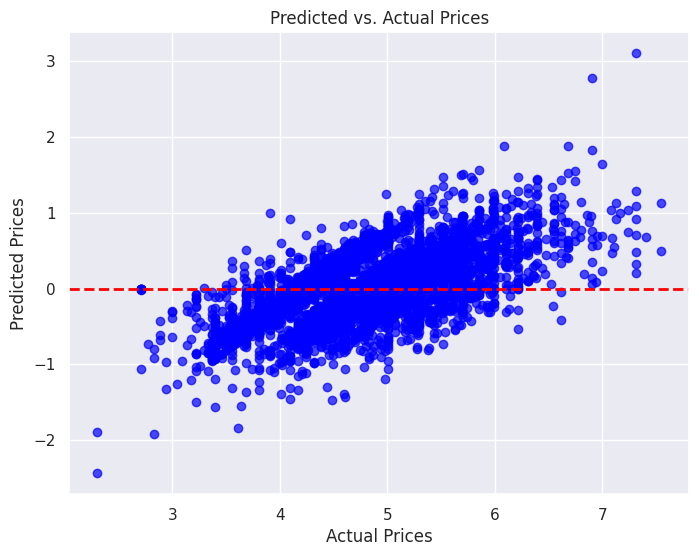

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_test_pred, c='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

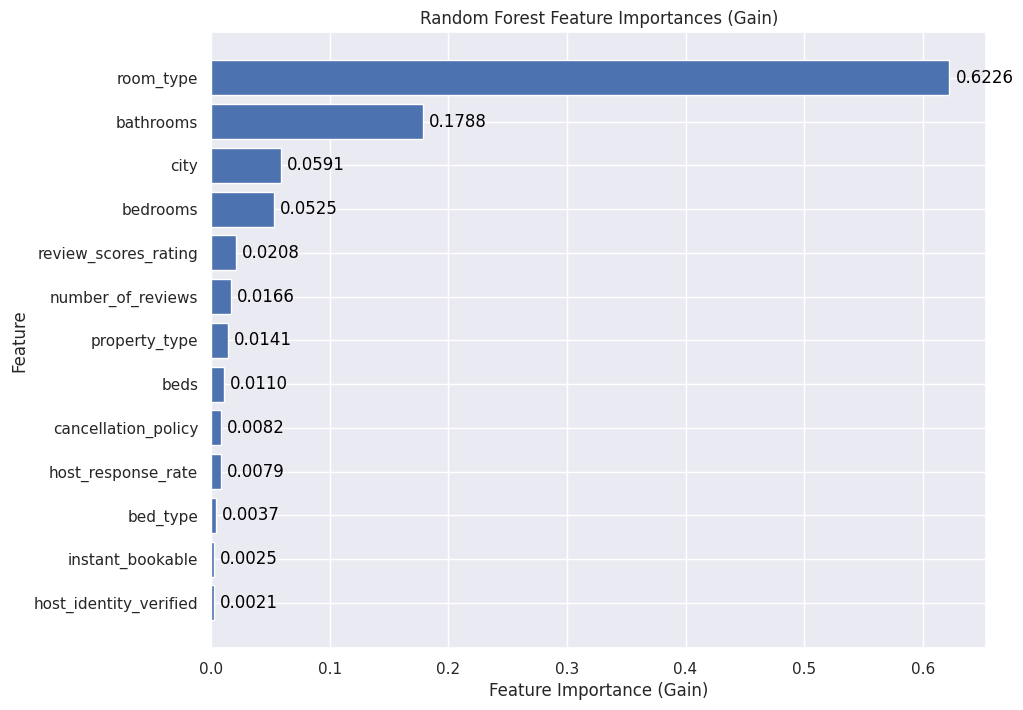

In [76]:
# Get feature importances from the trained model
feature_importances = final_rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Plot the feature importances with values
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances (Gain)')

# Add numerical values to the bars
for i, v in enumerate(feature_importances[sorted_idx]):
    plt.text(v + 0.005, i, f'{v:.4f}', color='black', va='center', fontsize=12)
plt.show()


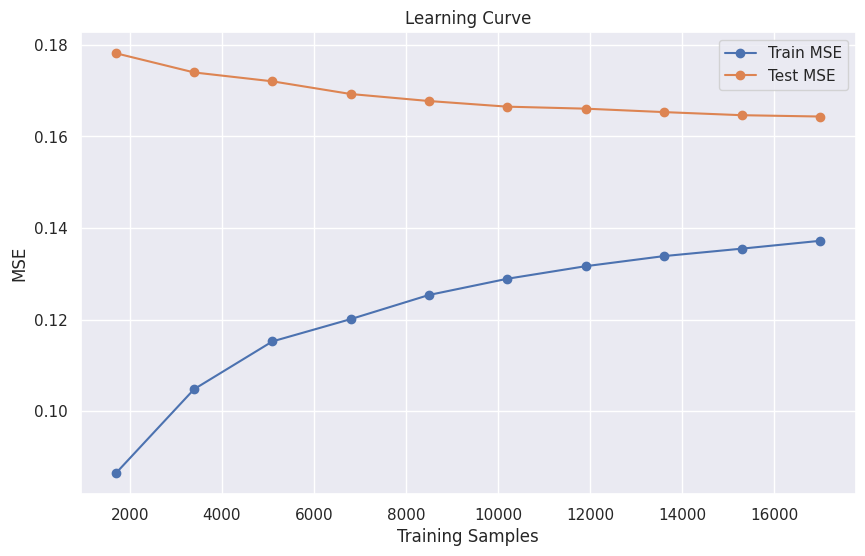

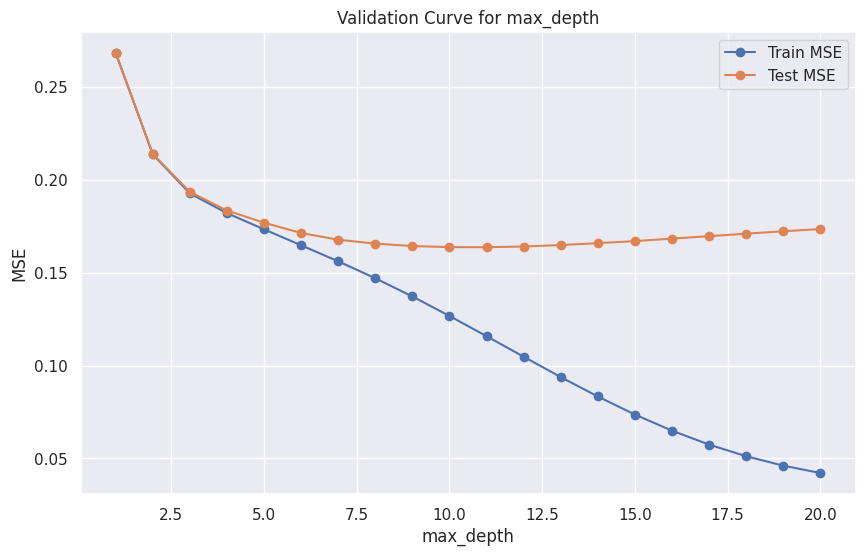

In [78]:

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    final_rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train MSE', marker='o')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Test MSE', marker='o')
plt.xlabel('Training Samples')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Validation Curve (for max_depth as an example)
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(
    final_rf_model, X_train, y_train, param_name='max_depth', param_range=param_range,
    cv=3, scoring='neg_mean_squared_error'
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, -train_scores.mean(axis=1), label='Train MSE', marker='o')
plt.plot(param_range, -test_scores.mean(axis=1), label='Test MSE', marker='o')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Validation Curve for max_depth')
plt.legend()
plt.grid(True)
plt.show()


### XGBoost - Log Price

In [48]:
X = normalized_data_merged.drop(['log_price'], axis=1)
y = normalized_data_merged['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Search
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10)
}

# Create an XGBoost model
xgb_model = xgb.XGBRegressor()

# Perform Random Search
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

# Get the best parameters from Randomized Search
best_params = random_search.best_params_
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']

# Print the best parameters from random search
print("Best Parameters from Randomized Search:")
print(f"Number of Estimators: {best_n_estimators}")
print(f"Learning Rate: {best_learning_rate}")
print(f"Max Depth: {best_max_depth}")

# set Grid Search range around the best parameters found from random search
param_grid = {
    'n_estimators': [best_n_estimators - 50, best_n_estimators, best_n_estimators + 50],
    'learning_rate': [best_learning_rate - 0.05, best_learning_rate, best_learning_rate + 0.05],
    'max_depth': [best_max_depth - 1, best_max_depth, best_max_depth + 1]
}

# build an XGBoost model
xgb_model = xgb.XGBRegressor()

# run Grid Search
grid_search = GridSearchCV(
    xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters from Grid Search
best_params_grid = grid_search.best_params_
best_n_estimators_grid = best_params_grid['n_estimators']
best_learning_rate_grid = best_params_grid['learning_rate']
best_max_depth_grid = best_params_grid['max_depth']

# Print the best parameters from Grid Search
print("\nBest Parameters from Grid Search:")
print(f"Number of Estimators: {best_n_estimators_grid}")
print(f"Learning Rate: {best_learning_rate_grid}")
print(f"Max Depth: {best_max_depth_grid}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Randomized Search:
Number of Estimators: 121
Learning Rate: 0.19524445288831496
Max Depth: 4
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Parameters from Grid Search:
Number of Estimators: 171
Learning Rate: 0.14524445288831495
Max Depth: 4


In [49]:
# Train the Final Model with Best Parameters from Grid Search
final_xgb = XGBRegressor(n_estimators=best_n_estimators_grid, learning_rate=best_learning_rate_grid, max_depth=best_max_depth_grid)
final_xgb.fit(X_train, y_train)

# Make Predictions of the target variable
y_train_pred = final_xgb.predict(X_train)
y_test_pred = final_xgb.predict(X_test)

# Calculate Metrics
# mse values
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# mae values
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# r2 values
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# rmse values
rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

print(f"MSE:")
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"\n-------------------")
print(f"MAE:")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"\n-------------------")
print(f"R2:")
print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")
print(f"\n-------------------")
print(f"RMSE:")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")


MSE:
Train MSE: 0.1461454732951915
Test MSE: 0.16548923989265793

-------------------
MAE:
Train MAE: 0.2938561099117362
Test MAE: 0.31389006316895246

-------------------
R2:
Train R2: 0.6801993490834055
Test R2: 0.6454948298565499

-------------------
RMSE:
Train RMSE: 0.382289776603026
Test RMSE: 0.4068036871669896


Train - Mean Squared Error(MSE) for max_depth 0: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 0: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 1: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 1: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 2: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 2: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 3: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 3: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 4: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 4: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 5: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 5: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 6: 0.1461454732951915
Test - Mean Squared Error(MSE) for max_depth 6: 0.16548923989265793
Train - Mean Squared Error(MSE) for max_depth 7:

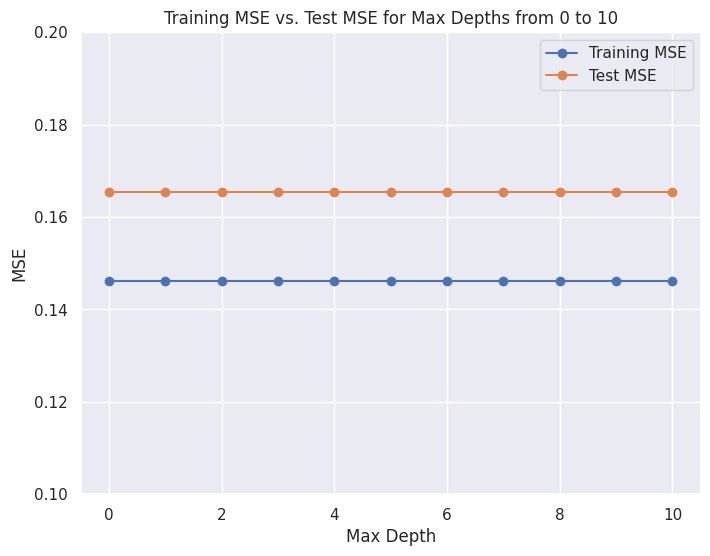

In [50]:
train_mses = []
test_mses = []

# List of model complexities (max_depth)
depths = range(0, 11)

for depth in depths:
    # Set the max_depth hyperparameter
    final_xgb.set_params(max_depth=depth)

    # Predict on the train set
    yhat_train = final_xgb.predict(X_train)
    # Predict on the test set
    yhat_test = final_xgb.predict(X_test)

    # Calculate MSE(training)
    train_mse = mean_squared_error(y_train, yhat_train)
    print(f"Train - Mean Squared Error(MSE) for max_depth {depth}: {train_mse}")
    # Calculate Mean Squared Error(test)
    test_mse = mean_squared_error(y_test, yhat_test)
    print(f"Test - Mean Squared Error(MSE) for max_depth {depth}: {test_mse}")
    train_mses.append(train_mse)
    test_mses.append(test_mse)

# Plot the training and test MSE values
plt.figure(figsize=(8, 6))
plt.plot( depths, train_mses, label='Training MSE', marker='o')
plt.plot( depths, test_mses, label='Test MSE', marker='o')
# Set the y-axis range
plt.ylim(0.1, 0.2)

# Label the axes and add a legend
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.title('Training MSE vs. Test MSE for Max Depths from 0 to 10')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

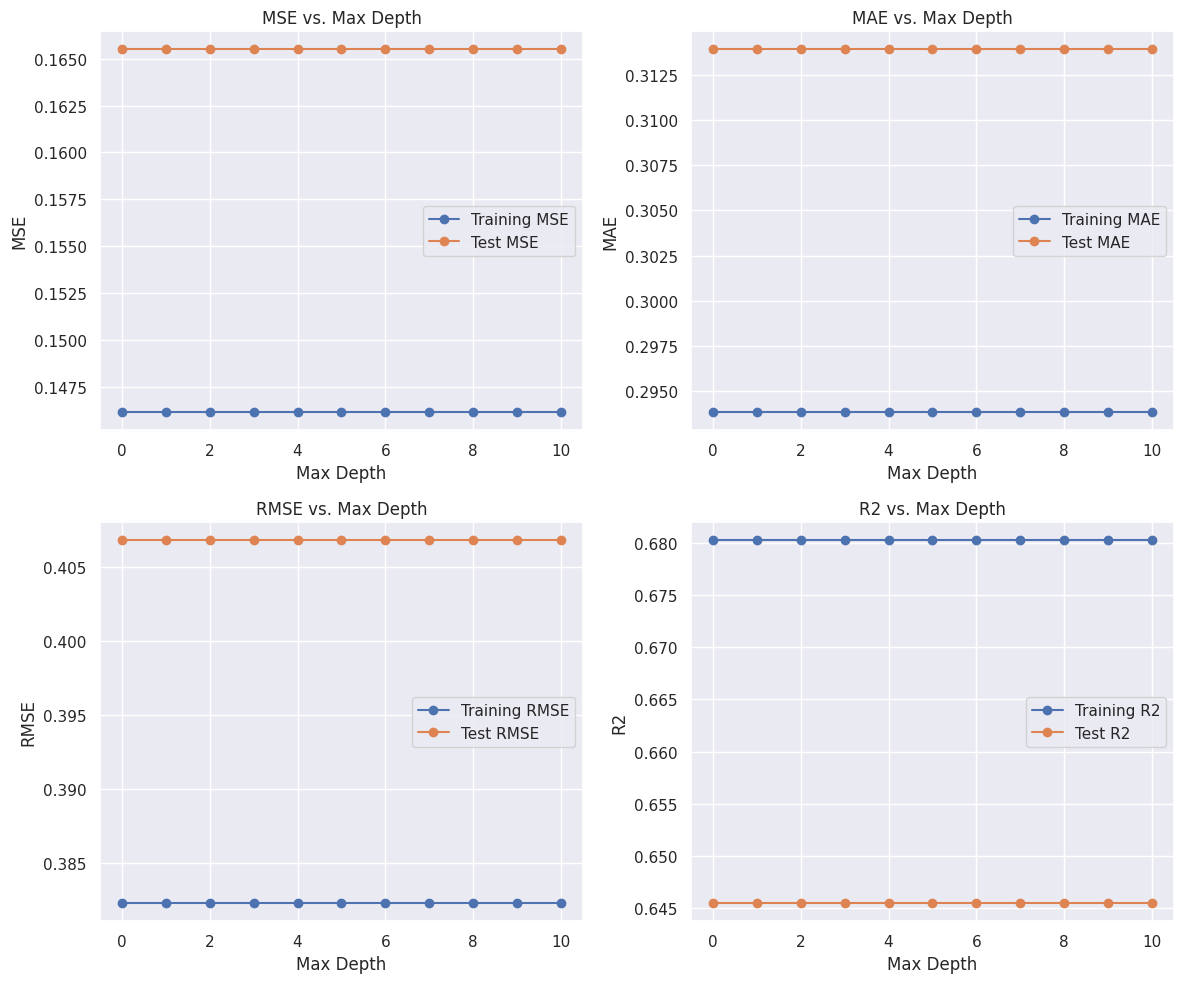

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Initialize lists to store metric values
train_metrics = {'MSE': [], 'MAE': [], 'RMSE': [], 'R2': []}
test_metrics = {'MSE': [], 'MAE': [], 'RMSE': [], 'R2': []}

# List of model complexities (max_depth)
depths = range(0, 11)

for depth in depths:
    # Set the max_depth hyperparameter
    final_xgb.set_params(max_depth=depth)

    # Predict on the train set
    yhat_train = final_xgb.predict(X_train)
    # Predict on the test set
    yhat_test = final_xgb.predict(X_test)

    # Calculate metrics for training
    train_mse = mean_squared_error(y_train, yhat_train)
    train_mae = mean_absolute_error(y_train, yhat_train)
    train_rmse = sqrt(train_mse)
    train_r2 = r2_score(y_train, yhat_train)

    # Calculate metrics for testing
    test_mse = mean_squared_error(y_test, yhat_test)
    test_mae = mean_absolute_error(y_test, yhat_test)
    test_rmse = sqrt(test_mse)
    test_r2 = r2_score(y_test, yhat_test)

    # Append metrics to lists
    train_metrics['MSE'].append(train_mse)
    train_metrics['MAE'].append(train_mae)
    train_metrics['RMSE'].append(train_rmse)
    train_metrics['R2'].append(train_r2)

    test_metrics['MSE'].append(test_mse)
    test_metrics['MAE'].append(test_mae)
    test_metrics['RMSE'].append(test_rmse)
    test_metrics['R2'].append(test_r2)

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot MSE
axes[0, 0].plot(depths, train_metrics['MSE'], label='Training MSE', marker='o')
axes[0, 0].plot(depths, test_metrics['MSE'], label='Test MSE', marker='o')
axes[0, 0].set_xlabel('Max Depth')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('MSE vs. Max Depth')
axes[0, 0].legend()

# Plot MAE
axes[0, 1].plot(depths, train_metrics['MAE'], label='Training MAE', marker='o')
axes[0, 1].plot(depths, test_metrics['MAE'], label='Test MAE', marker='o')
axes[0, 1].set_xlabel('Max Depth')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('MAE vs. Max Depth')
axes[0, 1].legend()

# Plot RMSE
axes[1, 0].plot(depths, train_metrics['RMSE'], label='Training RMSE', marker='o')
axes[1, 0].plot(depths, test_metrics['RMSE'], label='Test RMSE', marker='o')
axes[1, 0].set_xlabel('Max Depth')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_title('RMSE vs. Max Depth')
axes[1, 0].legend()

# Plot R2
axes[1, 1].plot(depths, train_metrics['R2'], label='Training R2', marker='o')
axes[1, 1].plot(depths, test_metrics['R2'], label='Test R2', marker='o')
axes[1, 1].set_xlabel('Max Depth')
axes[1, 1].set_ylabel('R2')
axes[1, 1].set_title('R2 vs. Max Depth')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In this scenario, it appears that the training and testing MSE values remain approximately constant across different `max_depth` values. This pattern suggests that the model may not be exhibiting clear signs of overfitting or underfitting.

- **Underfitting** typically occurs when the training error is significantly higher than the testing error. In this case, both training and testing errors are similar and relatively low, indicating that the model is capturing some patterns in the data.

- **Overfitting** typically occurs when the training error is much lower than the testing error, indicating that the model has memorized the training data but performs poorly on unseen data. However, in this case, both errors are similar and relatively low, which doesn't suggest overfitting.

It's important to note that a deeper analysis might involve examining additional metrics, such as learning curves, and considering the size of the dataset and the complexity of the model. Additionally, you might want to explore other hyperparameters, like the learning rate or the number of estimators, to further optimize your model's performance.

### Learning Curve

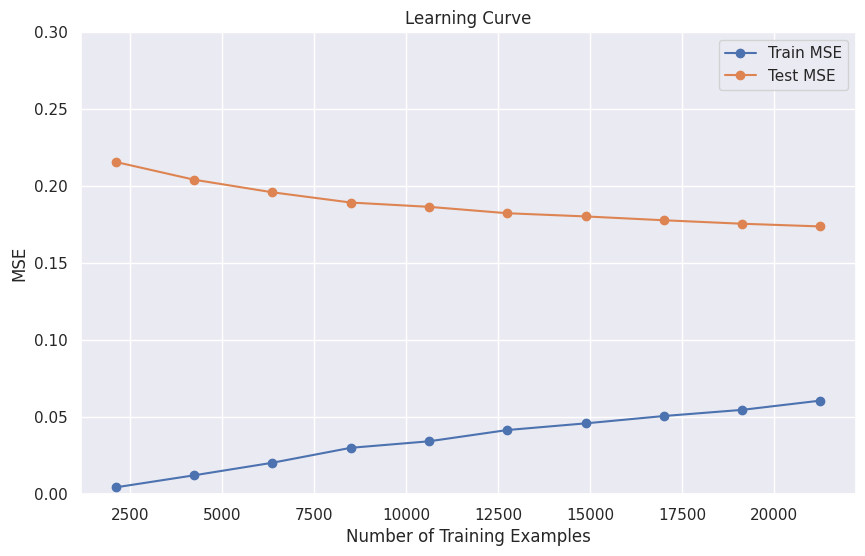

In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    final_xgb, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, scoring='neg_mean_squared_error')

# Plot learning curve
plt.figure(figsize=(10, 6))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Train MSE', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test MSE', marker='o')
plt.xlabel('Number of Training Examples')
plt.ylabel('MSE')
plt.ylim(0, 0.3)
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

### Feature Importances with Values

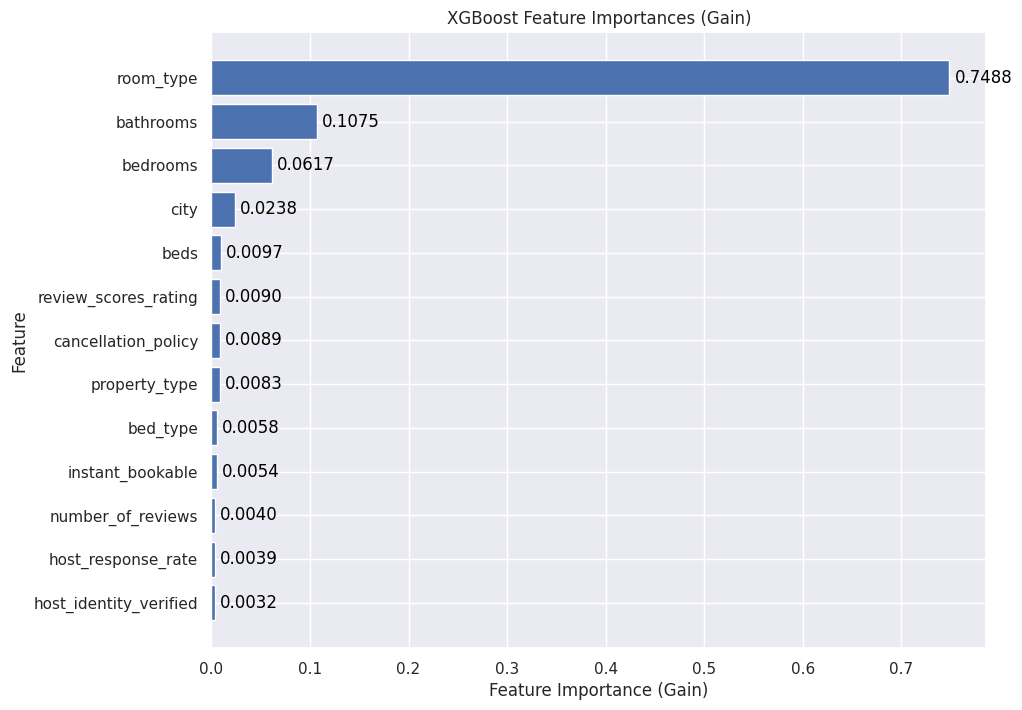

In [53]:
# Assuming you have already trained your XGBoost model and obtained the feature importances
XGBoost_model = xgb.XGBRegressor(n_estimators=best_n_estimators_grid, learning_rate=best_learning_rate_grid, max_depth=best_max_depth_grid)
XGBoost_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = XGBoost_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Plot the feature importances with values
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances (Gain)')

# Add numerical values to the bars
for i, v in enumerate(feature_importances[sorted_idx]):
    plt.text(v + 0.005, i, f'{v:.4f}', color='black', va='center', fontsize=12)
plt.show()


Interpretation: Higher gain values indicate that a feature is more important in making decisions and improving the model's accuracy. Features with higher gain values are considered more influential in the model's predictions.

### Validation Curve

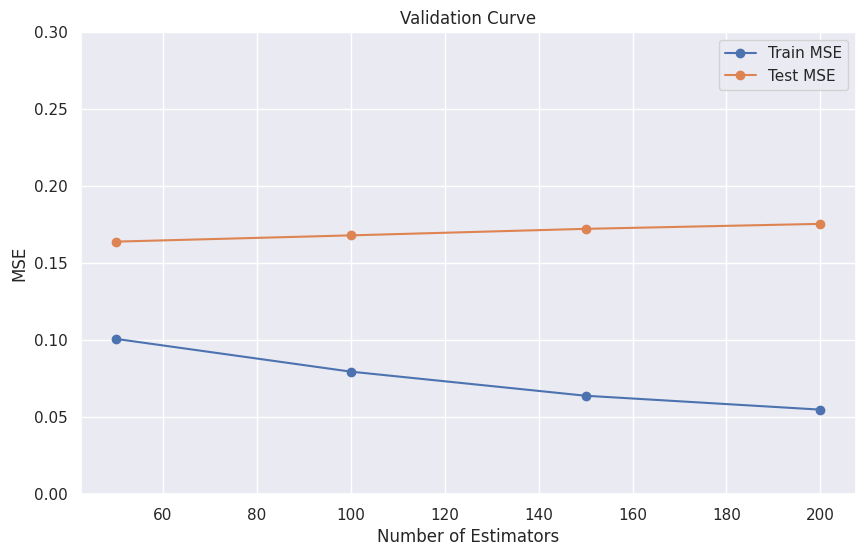

In [54]:
param_range = [50, 100, 150, 200]  # Vary the parameter of interest (e.g., n_estimators)
train_scores, test_scores = validation_curve(
    final_xgb, X, y, param_name='n_estimators', param_range=param_range, cv=3, scoring='neg_mean_squared_error')

# Plot validation curve
plt.figure(figsize=(10, 6))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.plot(param_range, train_scores_mean, label='Train MSE', marker='o')
plt.plot(param_range, test_scores_mean, label='Test MSE', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.ylim(0, 0.3)
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()


### Residual Plot:
In a residual plot, you can look for patterns in the residuals. A random scatter of residuals around the horizontal line at 0 suggests a good model fit. Any systematic patterns or trends in residuals could indicate underfitting or overfitting.

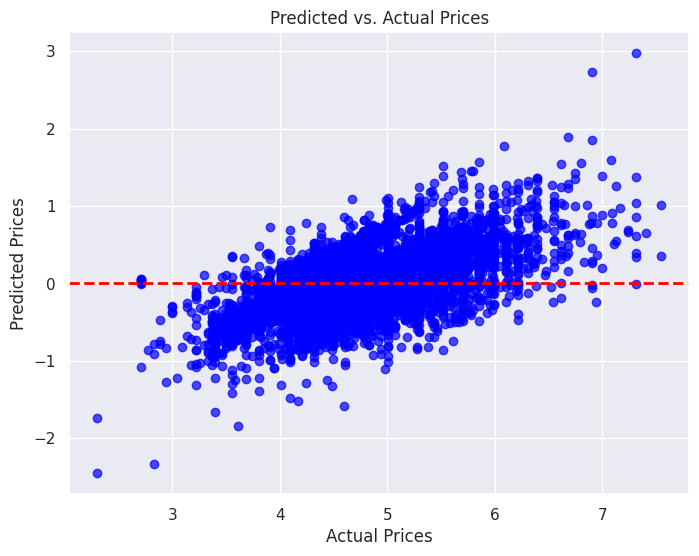

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_test_pred, c='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

Check for Overfitting or Underfitting:


*   If the training error (MSE, MAE, RMSE) is significantly lower than the test error, it might indicate overfitting.
*   If both training and test errors are high, it might indicate underfitting.



### LightGBM(LGBM)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 25500, number of used features: 13
[LightGBM] [Info] Start training from score 4.753324
Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1049, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 245, in train
    bo

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 25500, number of used features: 13
[LightGBM] [Info] Start training from score 4.753324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

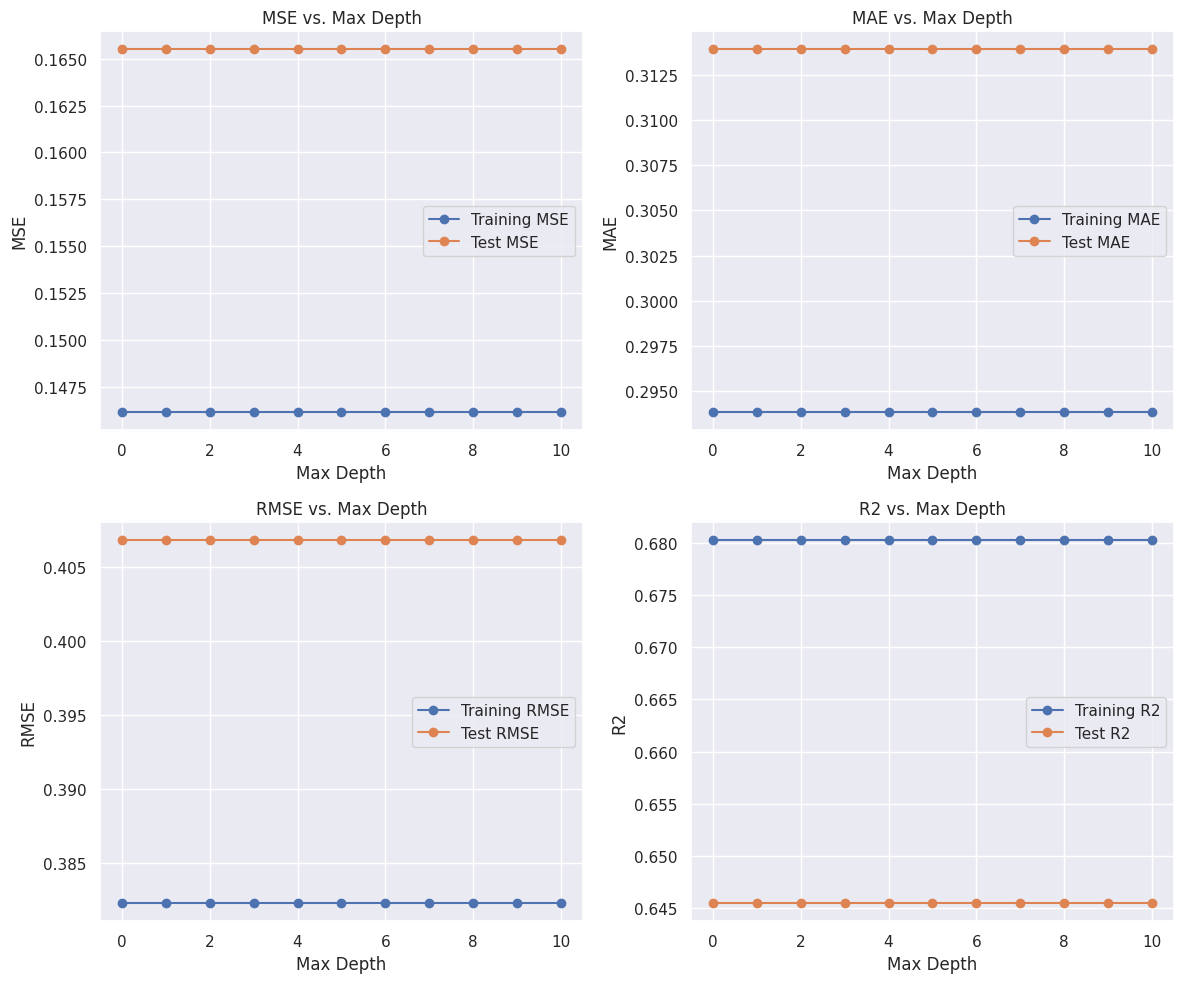

In [88]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for Randomized Search
random_param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(3, 15),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor()

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(
    lgb_model, param_distributions=random_param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)
best_random_params = random_search.best_params_

# Define a grid of hyperparameters centered around the best parameters from Randomized Search
grid_param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 50, best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],
    'learning_rate': [best_random_params['learning_rate'] - 0.05, best_random_params['learning_rate'], best_random_params['learning_rate'] + 0.05],
    'max_depth': [best_random_params['max_depth'] - 1, best_random_params['max_depth'], best_random_params['max_depth'] + 1],
    'subsample': [best_random_params['subsample'] - 0.05, best_random_params['subsample'], best_random_params['subsample'] + 0.05],
    'colsample_bytree': [best_random_params['colsample_bytree'] - 0.05, best_random_params['colsample_bytree'], best_random_params['colsample_bytree'] + 0.05]
}

# Initialize Grid Search with the LightGBM model
grid_search = GridSearchCV(
    lgb_model, param_grid=grid_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_grid_params = grid_search.best_params_

# Print the best hyperparameters selected by Randomized Search
print("Best Hyperparameters from Randomized Search:")
print(best_random_params)

# Print the best hyperparameters selected by Grid Search
print("\nBest Hyperparameters from Grid Search:")
print(best_grid_params)

# Initialize the final LightGBM model with the best hyperparameters from Grid Search
final_lgb_model = lgb.LGBMRegressor(**best_grid_params, random_state=42)
final_lgb_model.fit(X_train, y_train)

# Make predictions on both the training and test datasets
y_train_pred = final_lgb_model.predict(X_train)
y_test_pred = final_lgb_model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = sqrt(mse_train)
rmse_test = sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE:")
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"\n-------------------")
print(f"MAE:")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"\n-------------------")
print(f"R2:")
print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")
print(f"\n-------------------")
print(f"RMSE:")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot MSE
axes[0, 0].plot(depths, train_metrics['MSE'], label='Training MSE', marker='o')
axes[0, 0].plot(depths, test_metrics['MSE'], label='Test MSE', marker='o')
axes[0, 0].set_xlabel('Max Depth')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('MSE vs. Max Depth')
axes[0, 0].legend()

# Plot MAE
axes[0, 1].plot(depths, train_metrics['MAE'], label='Training MAE', marker='o')
axes[0, 1].plot(depths, test_metrics['MAE'], label='Test MAE', marker='o')
axes[0, 1].set_xlabel('Max Depth')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('MAE vs. Max Depth')
axes[0, 1].legend()

# Plot RMSE
axes[1, 0].plot(depths, train_metrics['RMSE'], label='Training RMSE', marker='o')
axes[1, 0].plot(depths, test_metrics['RMSE'], label='Test RMSE', marker='o')
axes[1, 0].set_xlabel('Max Depth')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_title('RMSE vs. Max Depth')
axes[1, 0].legend()

# Plot R2
axes[1, 1].plot(depths, train_metrics['R2'], label='Training R2', marker='o')
axes[1, 1].plot(depths, test_metrics['R2'], label='Test R2', marker='o')
axes[1, 1].set_xlabel('Max Depth')
axes[1, 1].set_ylabel('R2')
axes[1, 1].set_title('R2 vs. Max Depth')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


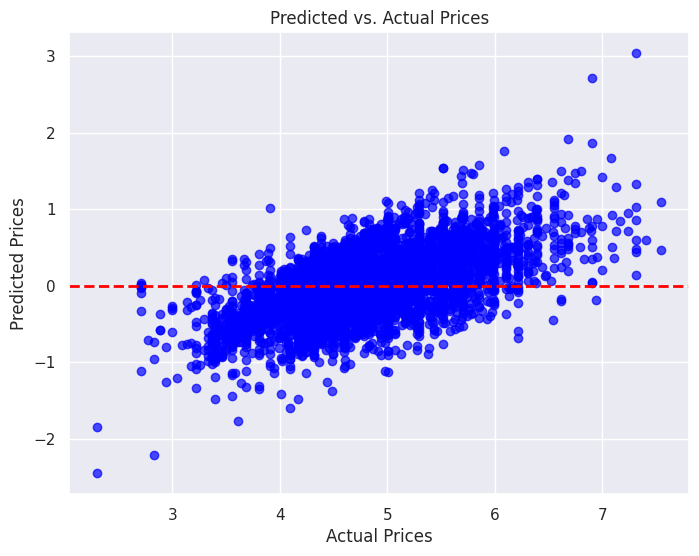

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_test_pred, c='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 25500, number of used features: 13
[LightGBM] [Info] Start training from score 4.753324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

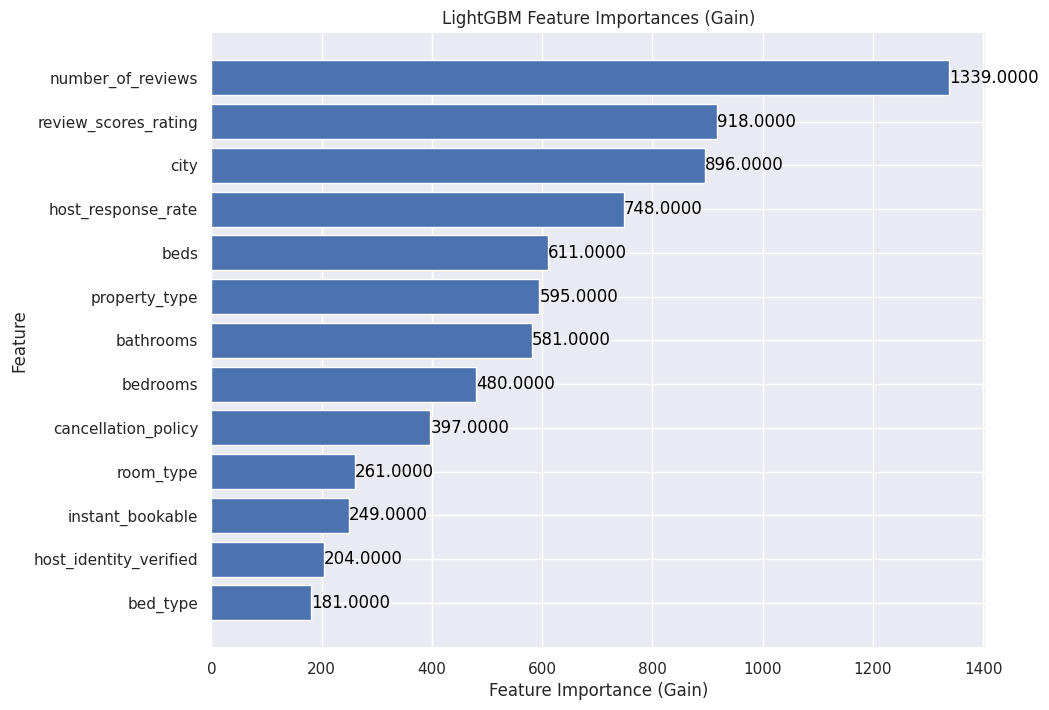

In [58]:
# Assuming you have already trained your XGBoost model and obtained the feature importances
final_lgb_model = lgb.LGBMRegressor(**best_grid_params, random_state=42)
final_lgb_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = final_lgb_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Plot the feature importances with values
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importances (Gain)')

# Add numerical values to the bars
for i, v in enumerate(feature_importances[sorted_idx]):
    plt.text(v + 0.005, i, f'{v:.4f}', color='black', va='center', fontsize=12)
plt.show()


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 2125, number of used features: 13
[LightGBM] [Info] Start training from score 4.755740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

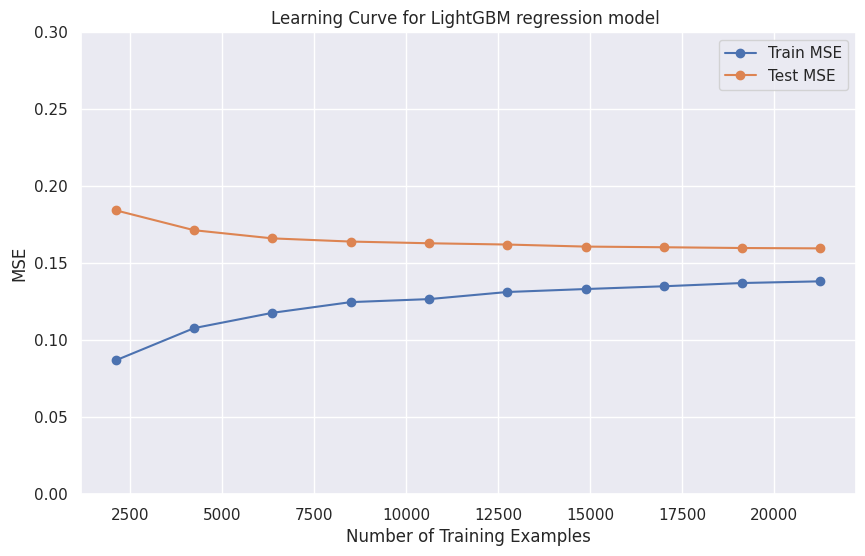

In [59]:
train_sizes, train_scores, test_scores = learning_curve(
    final_lgb_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, scoring='neg_mean_squared_error')

# Plot learning curve
plt.figure(figsize=(10, 6))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Train MSE', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test MSE', marker='o')
plt.xlabel('Number of Training Examples')
plt.ylabel('MSE')
plt.ylim(0, 0.3)
plt.title('Learning Curve for LightGBM regression model ')
plt.legend()
plt.grid(True)
plt.show()

### KNN — Random Search + Grid Search

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#set X ,y
X = normalized_data_merged.drop(['log_price'], axis=1)
y = normalized_data_merged['log_price']

#split data 80:20 again to view the KNN model with k =12 is the best or not.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the hyperparameter search space for random searchCV
param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Create the KNN model
knn = KNeighborsRegressor()


# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(best_params)
best_n_neighbors = best_params['n_neighbors']
best_algorithm = best_params['algorithm']
best_weights = best_params['weights']
'''
#predict
yhat_train = knn.predict(y_train)
yhat_test = knn.predict(y_test)

# Evaluate the final model on the test dataset
mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)
mae_train = mean_absolute_error(y_train, yhat_train)
mae_test = mean_absolute_error(y_test, yhat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
train_accuracy = r2_score(y_train, yhat_train)
test_accuracy = r2_score(y_test, yhat_test)

#print info
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("Mean Absolute Error (MAE):", mae)
print(f"R2 score for training: {train_accuracy}")
print(f"R2 score for testing: {test_accuracy}")
'''
#Define the hyperparameter search space for grid search CV
param_grid = {
    'n_neighbors': [best_n_neighbors-2, best_n_neighbors-1, best_n_neighbors, best_n_neighbors+1, best_n_neighbors+2],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_dist, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train the final model with the best hyperparameters
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train, y_train)

#predict y
yhat_train = best_knn.predict(X_train)
yhat_test = best_knn.predict(X_test)

# Evaluate the final model on the test dataset
mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)
mae_train = mean_absolute_error(y_train, yhat_train)
mae_test = mean_absolute_error(y_test, yhat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
train_accuracy = r2_score(y_train, yhat_train)
test_accuracy = r2_score(y_test, yhat_test)

#print info
print("Mean Squared Error (MSE):")
print(f"\ttraining MSE:{mse_train}")
print(f"\ttest MSE:{mse_test}")
print("Root Mean Squared Error (RMSE):")
print(f"\ttraining RMSE: {rmse_train}")
print(f"\ttest RMSE: {rmse_test}")
print(f"Mean Absolute Error:")
print(f"\ttraining MAE: {mae_train}")
print(f"\ttraining MAE: {mae_test}")
print("R2-Score:")
print(f"R2 score for training: {train_accuracy}")
print(f"R2 score for testing: {test_accuracy}")

{'weights': 'uniform', 'n_neighbors': 11, 'algorithm': 'kd_tree'}
{'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Mean Squared Error (MSE):
	training MSE:0.16139796247513913
	test MSE:0.20615050053667644
Root Mean Squared Error (RMSE):
	training RMSE: 0.40174365268805323
	test RMSE: 0.45403799459591093
Mean Absolute Error:
	training MAE: 0.30712069414802756
	training MAE: 0.3455387781557933
R2-Score:
R2 score for training: 0.6468233172579569
R2 score for testing: 0.5583917219311961


In [66]:
# #use random search and grid search method to find the best model with the parameter

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# #set X ,y
# X = normalized_data_merged.drop(['log_price'], axis=1)
# y = normalized_data_merged['log_price']

# #split data 80:20 again to view the KNN model with k =12 is the best or not.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Define the hyperparameter search space for random searchCV
# param_dist = {
#     'n_neighbors': np.arange(1, 21),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }

# # Create the KNN model
# knn = KNeighborsRegressor()


# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42)
# random_search.fit(X_train, y_train)
# best_params = random_search.best_params_
# print(best_params)
# best_n_neighbors = best_params['n_neighbors']
# best_algorithm = best_params['algorithm']
# best_weights = best_params['weights']

# # Evaluate the final model on the test dataset
# mse = mean_squared_error(y_test, yhat_test)
# mae = mean_absolute_error(y_test, yhat_test)
# rmse = np.sqrt(mse)
# train_accuracy = r2_score(y_train, yhat_train)
# test_accuracy = r2_score(y_test, yhat_test)

# #print info
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print("Mean Absolute Error (MAE):", mae)
# print(f"R2 score for training: {train_accuracy}")
# print(f"R2 score for testing: {test_accuracy}")

# #Define the hyperparameter search space for grid search CV
# param_grid = {
#     'n_neighbors': [best_n_neighbors-2, best_n_neighbors-1, best_n_neighbors, best_n_neighbors+1, best_n_neighbors+2],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }
# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=knn, param_grid=param_dist, scoring='neg_mean_squared_error', cv=3)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(best_params)

# # Train the final model with the best hyperparameters
# best_knn = KNeighborsRegressor(**best_params)
# best_knn.fit(X_train, y_train)

# #predict y
# yhat_train = best_knn.predict(X_train)
# yhat_test = best_knn.predict(X_test)

# # Evaluate the final model on the test dataset
# mse = mean_squared_error(y_test, yhat_test)
# mae = mean_absolute_error(y_test, yhat_test)
# rmse = np.sqrt(mse)
# train_accuracy = r2_score(y_train, yhat_train)
# test_accuracy = r2_score(y_test, yhat_test)

# #print info
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print("Mean Absolute Error (MAE):", mae)
# print(f"R2 score for training: {train_accuracy}")
# print(f"R2 score for testing: {test_accuracy}")



{'weights': 'uniform', 'n_neighbors': 11, 'algorithm': 'kd_tree'}
Mean Squared Error (MSE): 0.16548923989265793
Root Mean Squared Error (RMSE): 0.4068036871669896
Mean Absolute Error (MAE): 0.31389006316895246
R2 score for training: 0.6801993490834055
R2 score for testing: 0.6454948298565499
{'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Mean Squared Error (MSE): 0.20615050053667644
Root Mean Squared Error (RMSE): 0.45403799459591093
Mean Absolute Error (MAE): 0.3455387781557933
R2 score for training: 0.6468233172579569
R2 score for testing: 0.5583917219311961


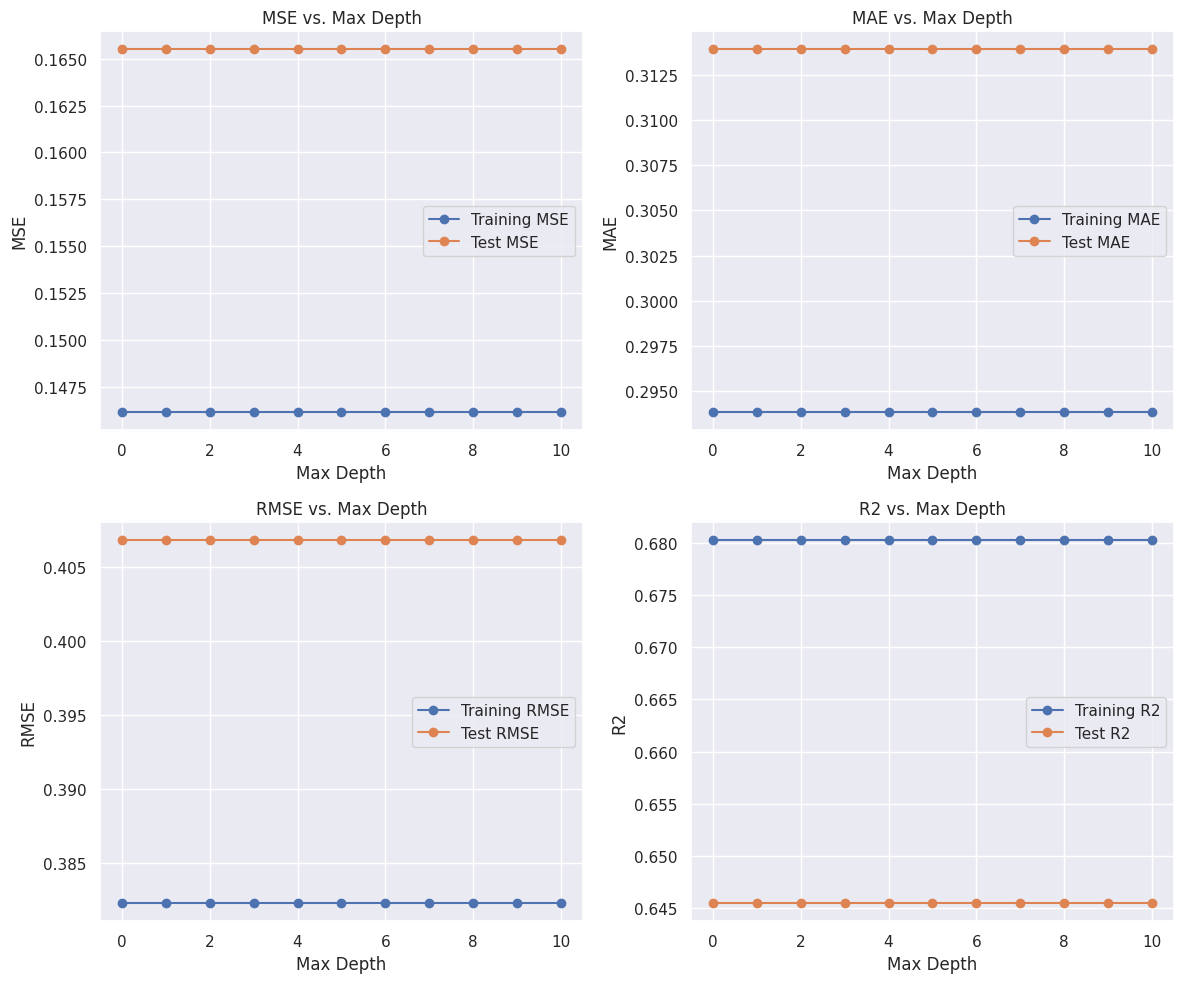

In [67]:
# Predict on both training and test datasets
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Calculate metrics for both training and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot MSE
axes[0, 0].plot(depths, train_metrics['MSE'], label='Training MSE', marker='o')
axes[0, 0].plot(depths, test_metrics['MSE'], label='Test MSE', marker='o')
axes[0, 0].set_xlabel('Max Depth')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('MSE vs. Max Depth')
axes[0, 0].legend()

# Plot MAE
axes[0, 1].plot(depths, train_metrics['MAE'], label='Training MAE', marker='o')
axes[0, 1].plot(depths, test_metrics['MAE'], label='Test MAE', marker='o')
axes[0, 1].set_xlabel('Max Depth')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('MAE vs. Max Depth')
axes[0, 1].legend()

# Plot RMSE
axes[1, 0].plot(depths, train_metrics['RMSE'], label='Training RMSE', marker='o')
axes[1, 0].plot(depths, test_metrics['RMSE'], label='Test RMSE', marker='o')
axes[1, 0].set_xlabel('Max Depth')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_title('RMSE vs. Max Depth')
axes[1, 0].legend()

# Plot R2
axes[1, 1].plot(depths, train_metrics['R2'], label='Training R2', marker='o')
axes[1, 1].plot(depths, test_metrics['R2'], label='Test R2', marker='o')
axes[1, 1].set_xlabel('Max Depth')
axes[1, 1].set_ylabel('R2')
axes[1, 1].set_title('R2 vs. Max Depth')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


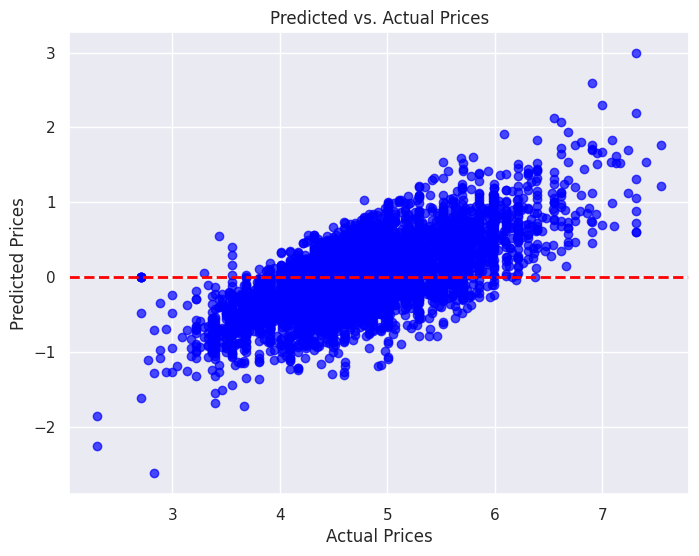

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_test_pred, c='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

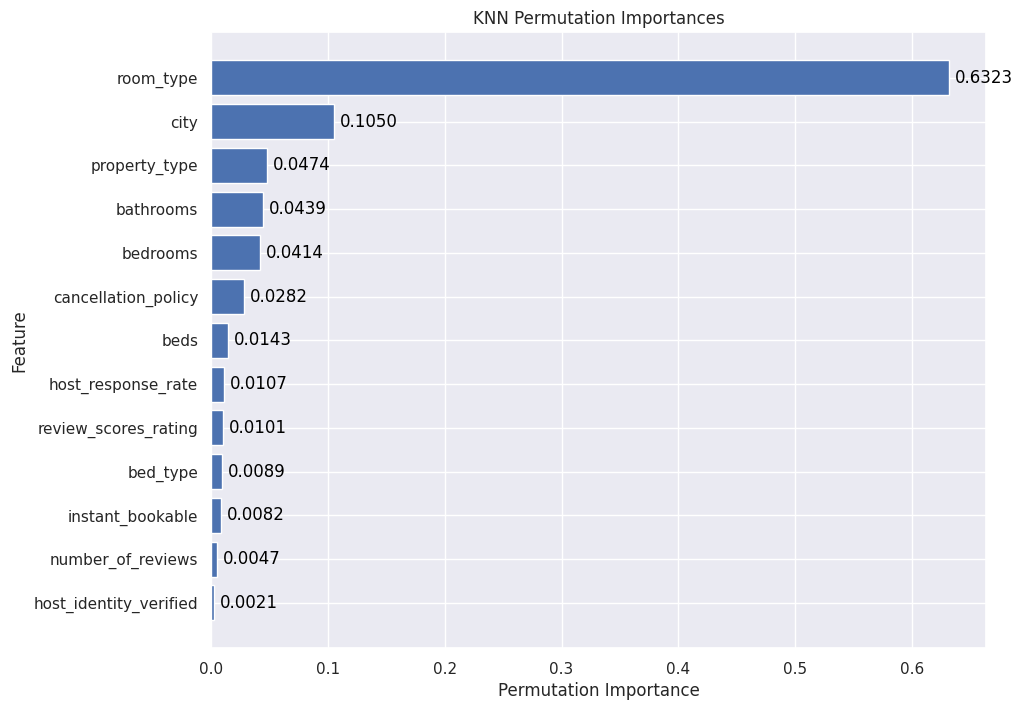

In [69]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
perm_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=30, random_state=42)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the feature importances with values
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('KNN Permutation Importances')

# Add numerical values to the bars
for i, v in enumerate(perm_importance.importances_mean[sorted_idx]):
    plt.text(v + 0.005, i, f'{v:.4f}', color='black', va='center', fontsize=12)
plt.show()


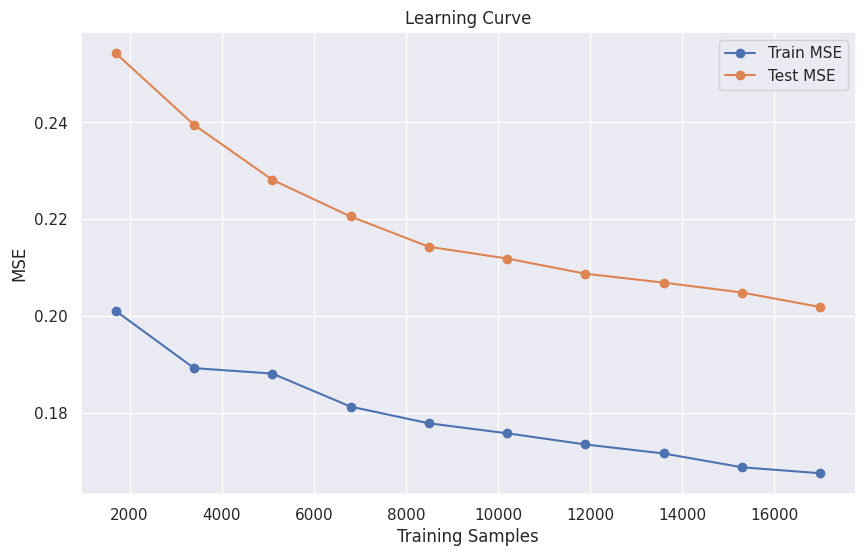

In [85]:
from sklearn.model_selection import learning_curve, validation_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_knn, X_train, y_train, cv=3, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train MSE', marker='o')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Test MSE', marker='o')
plt.xlabel('Training Samples')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# #use random search and grid search method to find the best model with the parameter

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# #set X ,y
# X = normalized_data_merged.drop(['log_price'], axis=1)
# y = normalized_data_merged['log_price']

# #split data 80:20 again to view the KNN model with k =12 is the best or not.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Define the hyperparameter search space for random searchCV
# param_dist = {
#     'n_neighbors': np.arange(1, 21),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }

# # Create the KNN model
# knn = KNeighborsRegressor()


# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
# random_search.fit(X_train, y_train)
# best_params = random_search.best_params_
# print(best_params)
# best_n_neighbors = best_params['n_neighbors']
# best_algorithm = best_params['algorithm']
# best_weights = best_params['weights']

# # Evaluate the final model on the test dataset
# mse = mean_squared_error(y_test, yhat_test)
# mae = mean_absolute_error(y_test, yhat_test)
# rmse = np.sqrt(mse)
# train_accuracy = r2_score(y_train, yhat_train)
# test_accuracy = r2_score(y_test, yhat_test)

# #print info
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print("Mean Absolute Error (MAE):", mae)
# print(f"R2 score for training: {train_accuracy}")
# print(f"R2 score for testing: {test_accuracy}")

# #Define the hyperparameter search space for grid search CV
# param_grid = {
#     'n_neighbors': [best_n_neighbors-2, best_n_neighbors-1, best_n_neighbors, best_n_neighbors+1, best_n_neighbors+2],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }
# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=knn, param_grid=param_dist, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(best_params)

# # Train the final model with the best hyperparameters
# best_knn = KNeighborsRegressor(**best_params)
# best_knn.fit(X_train, y_train)

# #predict y
# yhat_train = best_knn.predict(X_train)
# yhat_test = best_knn.predict(X_test)

# # Evaluate the final model on the test dataset
# mse = mean_squared_error(y_test, yhat_test)
# mae = mean_absolute_error(y_test, yhat_test)
# rmse = np.sqrt(mse)
# train_accuracy = r2_score(y_train, yhat_train)
# test_accuracy = r2_score(y_test, yhat_test)

# #print info
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print("Mean Absolute Error (MAE):", mae)
# print(f"R2 score for training: {train_accuracy}")
# print(f"R2 score for testing: {test_accuracy}")

In [71]:
# #use random search and grid search method to find the best model with the parameter

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# #set X ,y
# X = normalized_data_merged.drop(['log_price'], axis=1)
# y = normalized_data_merged['log_price']

# #split data 80:20 again to view the KNN model with k =12 is the best or not.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Define the hyperparameter search space for random searchCV
# param_dist = {
#     'n_neighbors': np.arange(1, 21),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }

# # Create the KNN model
# knn = KNeighborsRegressor()


# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=10, random_state=42)
# random_search.fit(X_train, y_train)
# best_params = random_search.best_params_
# print(best_params)
# best_n_neighbors = best_params['n_neighbors']
# best_algorithm = best_params['algorithm']
# best_weights = best_params['weights']

# # Evaluate the final model on the test dataset
# mse = mean_squared_error(y_test, yhat_test)
# mae = mean_absolute_error(y_test, yhat_test)
# rmse = np.sqrt(mse)
# train_accuracy = r2_score(y_train, yhat_train)
# test_accuracy = r2_score(y_test, yhat_test)

# #print info
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print("Mean Absolute Error (MAE):", mae)
# print(f"R2 score for training: {train_accuracy}")
# print(f"R2 score for testing: {test_accuracy}")

# #Define the hyperparameter search space for grid search CV
# param_grid = {
#     'n_neighbors': [best_n_neighbors-2, best_n_neighbors-1, best_n_neighbors, best_n_neighbors+1, best_n_neighbors+2],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }
# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=knn, param_grid=param_dist, scoring='neg_mean_squared_error', cv=10)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(best_params)

# # Train the final model with the best hyperparameters
# best_knn = KNeighborsRegressor(**best_params)
# best_knn.fit(X_train, y_train)

# #predict y
# yhat_train = best_knn.predict(X_train)
# yhat_test = best_knn.predict(X_test)

# # Evaluate the final model on the test dataset
# mse = mean_squared_error(y_test, yhat_test)
# mae = mean_absolute_error(y_test, yhat_test)
# rmse = np.sqrt(mse)
# train_accuracy = r2_score(y_train, yhat_train)
# test_accuracy = r2_score(y_test, yhat_test)

# #print info
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print("Mean Absolute Error (MAE):", mae)
# print(f"R2 score for training: {train_accuracy}")
# print(f"R2 score for testing: {test_accuracy}")

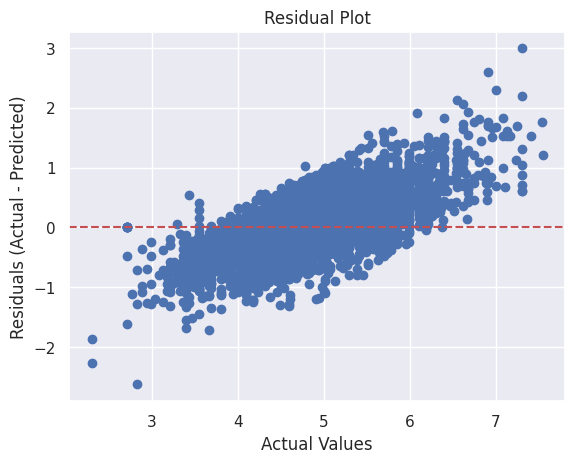

In [72]:
# the scatter plot when the model with the best k

residuals = y_test - yhat_test
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

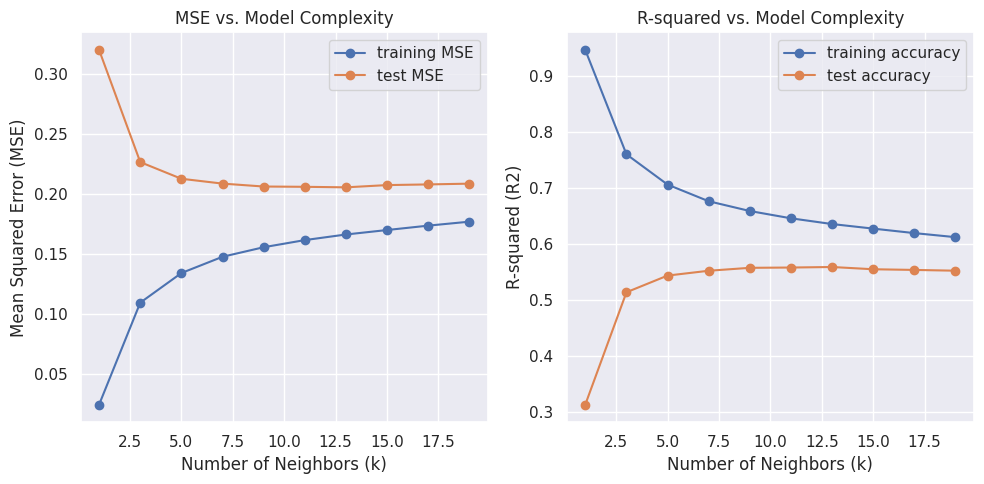

In [73]:
# Define a range of values for the hyperparameter k to plot the graph


# Create empty lists to store performance metrics
train_mse_values = []
test_mse_values = []
train_r2_values = []
test_r2_values = []

k_values = range(1,20,2)
# Iterate through different values of k
for k in k_values:
    # Create and fit the KNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    yhat_train = knn.predict(X_train)
    yhat_test = knn.predict(X_test)

    # Calculate and store performance metrics
    train_mse = mean_squared_error(y_train, yhat_train)
    test_mse = mean_squared_error(y_test, yhat_test)
    train_r2 = r2_score(y_train, yhat_train)
    test_r2 = r2_score(y_test, yhat_test)

    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

# Create a plot to visualize the relationship between k and performance metrics
plt.figure(figsize=(10, 5))

# Plot Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.plot(k_values, train_mse_values, label='training MSE', marker='o', linestyle='-')
plt.plot(k_values, test_mse_values, label='test MSE', marker='o', linestyle='-')
plt.title('MSE vs. Model Complexity')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# Plot R-squared
plt.subplot(1, 2, 2)
plt.plot(k_values, train_r2_values, label = 'training accuracy', marker='o', linestyle='-')
plt.plot(k_values, test_r2_values, label = 'test accuracy', marker='o', linestyle='-')
plt.title('R-squared vs. Model Complexity')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R-squared (R2)')
plt.legend()

plt.tight_layout()
plt.show()

###Analysis for KNN model(split 80:20)
Initially, we split our data into an 80:20 train-test split. We then used RandomizedSearchCV to find the KNN model with the best hyperparameters. Using the best parameters from the random search, we defined the search space for GridSearchCV to further tune the model. With 3-fold cross-validation, both methods found 11 neighbors to be optimal. However, when using 5-fold CV, the optimal number of neighbors differed slightly, with 10 for random search and 12 for grid search. Setting CV to 10 resulted in an optimal value of 12 neighbors for random search versus 11 for grid search. Given this variability, we performed k-fold cross-validation testing KNN models with neighbor values of 10, 11, and 12. Using k=10 folds, we evaluated the models based on average MSE, MAE and R2 score. The model with 12 neighbors achieved the best performance. In addition, we also compare the MSE, R2-score and MAE between different cv setting for both method, we also find the MSE and MAE is lowest and the R2-score is the highest when nighbor_n = 12.Therefore, through this comprehensive tuning and evaluation process, a KNN model with 12 neighbors is recommended based on having the optimal results.

Analysis:
A k-nearest neighbors (KNN) model was developed to predict house prices based on various features like bedrooms, house type etc. The data was split into 10 folds and KNN models trained with k ranging from 1 to 14 neighbors, aims to find the optimal k value for the model and avoid the bias. The model performance was evaluated using mean squared error (MSE), Mean Absolute Error(MAE) on the test folds. R2 Score on the training and testing folds.

After training, we can find that MSE, MAE decreased as k increased from 1 to 12, but then started to increase again after 12 neighbors. This indicates that a moderate k is optimal, as small values of k are too localized while large k invites noise. Thus, the best model performance was achieved with k=12, which had the lowest average MSE of 0.19506526508576705 and the lowest average MAE of 0.3371168640387032 and highest test accuracy(R2 score) of 0.5747516416893007 across the 10 folds. In addition, we plot the scatter plot predicted log hosue price vs. actual house price. From the scatter plot, we can find that the scatter plot using k=12 shows a reasonably strong positive correlation, with most predictions clustered along the diagonal. This indicates the KNN model with k=12 makes accurate predictions overall.